<a href="https://colab.research.google.com/github/smreynolds92/Great-Learning/blob/main/INN_Learner_Notebook_Full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

I have used the class workbooks and my previous projects as an example for much of my coding in this project.

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense, Dropout, Activation, BatchNormalization

# importing SMOTE
from imblearn.over_sampling import SMOTE

import random

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
# Connecting to google colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Intro to NN/bank-1.csv')

# Check the top five records of the data
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Copying data to another variable to avoid any changes to original data
data1 = data.copy()

## Data Overview

In [6]:
# Showing the beginning and end of the columns in the data
data1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# The number of columns and row in the data set
data1.shape

(10000, 14)

In [8]:
# Method to check the info of the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observations:**

There are no missing values, and there are 2 float64, 9 int64, and 3 object types.

In [9]:
# Checking for any missing values just in case
data1.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Observations:**

There are no null values.

In [10]:
# Let's also check for duplicate rows in the dataset
data1.duplicated().sum()

0

**Observations:**

There are no duplicates.

In [11]:
# Number of unique values in each column
data1.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [12]:
# Dropping the ID columns since each value is unique
data1.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

**Observations:**

Dropping the unique variables and other non-necessary variables.

In [13]:
# Method to check the info of the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [14]:
# Let's check the summary statistics of the data
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


**Observations:**

Reviewing the statistical data for the numberical values.

In [15]:
# Putting the object columns names in a list and appending the int64 dependent variable
obj_cols = data1.select_dtypes(include = ['object']).columns.tolist()

obj_cols

['Geography', 'Gender']

In [16]:
# Method to convert the list just created from type object/int64 to category
for i in obj_cols:
    data1[i] = data1[i].astype('object')

In [17]:
# Printing the categorial list data in a format to show the count and percentage of each category in each column

for column in obj_cols:
    print(data1[column].value_counts())
    print('-'*50)
    print(data1[column].value_counts(1)*100)
    print('-'*50, '\n\n')

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
--------------------------------------------------
Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64
-------------------------------------------------- 


Gender
Male      5457
Female    4543
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64
-------------------------------------------------- 




**Observations:**

Reviewing the statistical data for the object types.

## Exploratory Data Analysis

In [18]:
# Function to create labeled barplots for categorical variables

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])            # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 3, 5))
    else:
        plt.figure(figsize = (n + 3, 5))

    plt.xticks(rotation = 45, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Spectral",
        order = data[feature].value_counts().sort_values(ascending=False).index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )                              # Percentage of each class of the category
        else:
            label = p.get_height()         # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()                 # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )                                 # Annotate the percentage

    plt.show()                            # Show the plot

In [19]:
# Defining the hist_box() function for the numerical columns
def hist_box(data, feature, figsize=(13, 7), kde=True, bins=None):
  figure, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=figsize)

  # Adding a graph in each part
  sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color='violet')

  if bins==None:
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)
  else:
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)

  ax_hist.axvline(data[feature].mean(), color='green', linestyle='--') # Green line corresponds to the mean in the plot
  ax_hist.axvline(data[feature].median(), color='orange', linestyle='-') # Orange line corresponds to the median in the plot

### Univariate Analysis

**CreditScore**

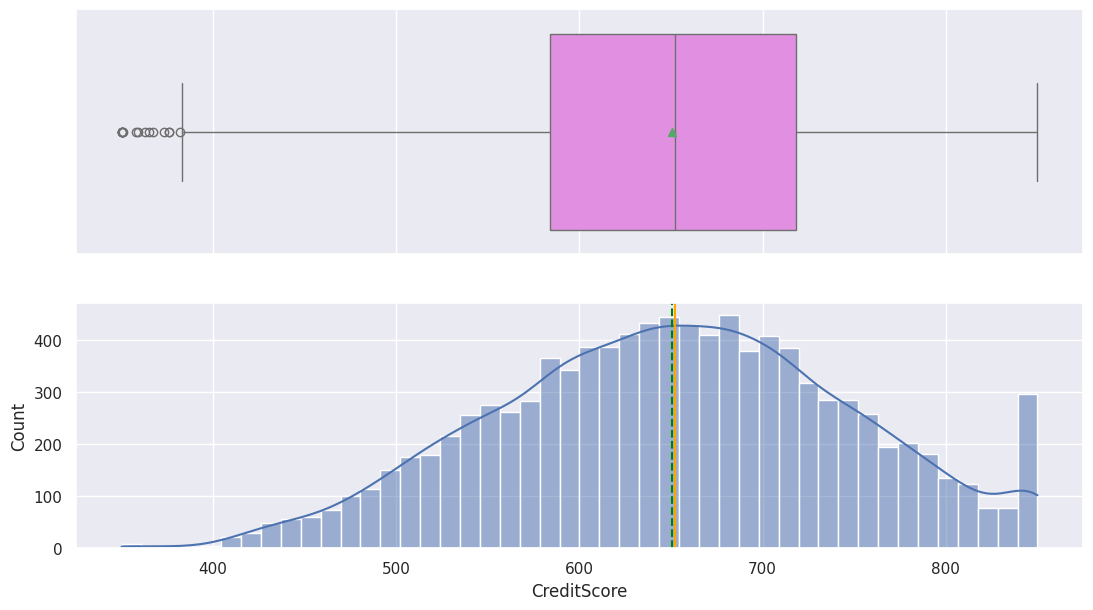

In [20]:
# Histogram/boxplot for CreditScore column
hist_box(data1, 'CreditScore', bins=46)

**Observations:**

Left skewed with outliers and highest score ramps back up on counts.

**Geography**

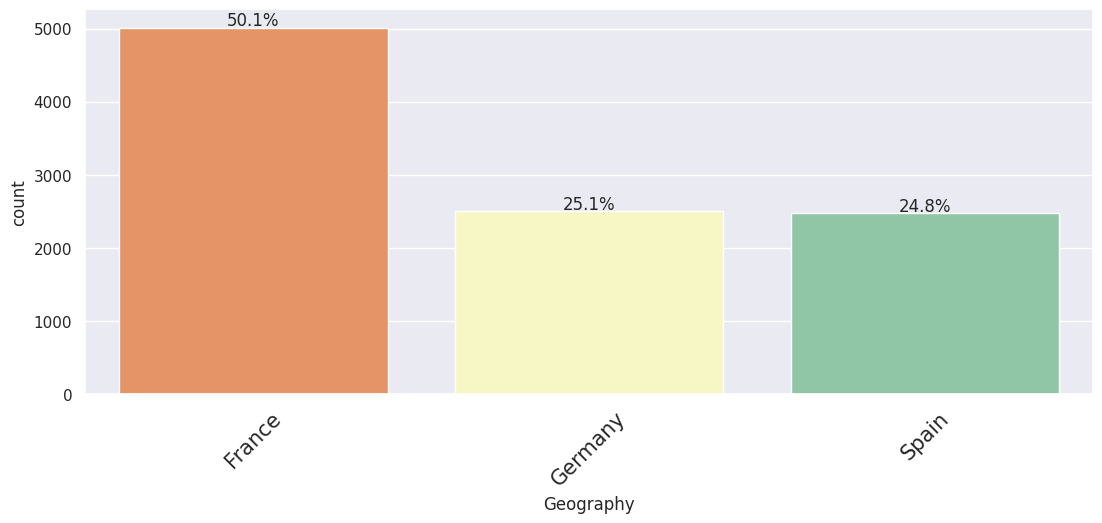

In [21]:
# Labeled barplot for Geography column
labeled_barplot(data1, "Geography", perc=True, n=10)

**Observations:**

France has almost twice as many counts as Germany or Spain.

**Gender**

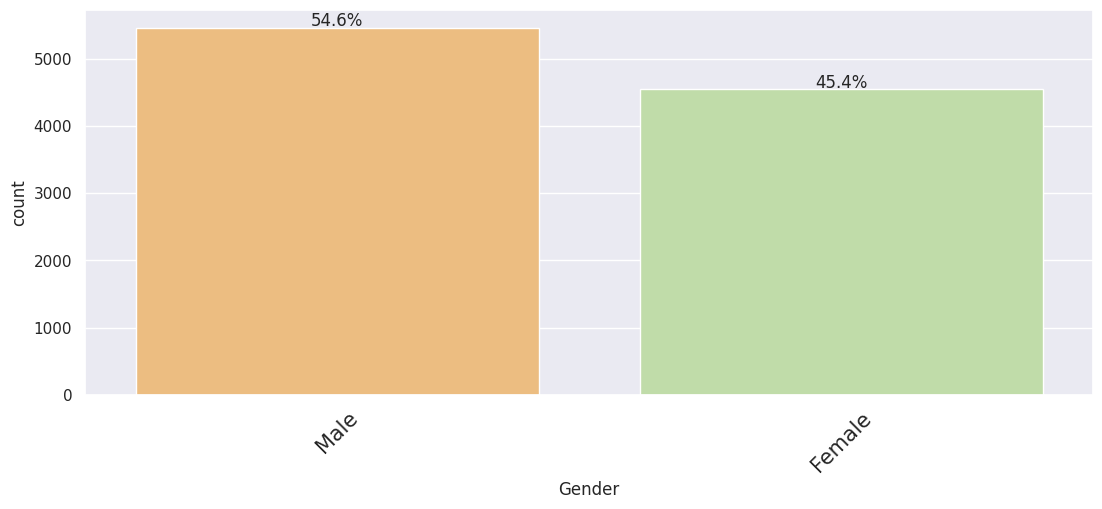

In [22]:
# Labeled barplot for Gender column
labeled_barplot(data1, "Gender", perc=True, n=10)

**Observations:**

Males slightly outnumber Female customers.

**Age**

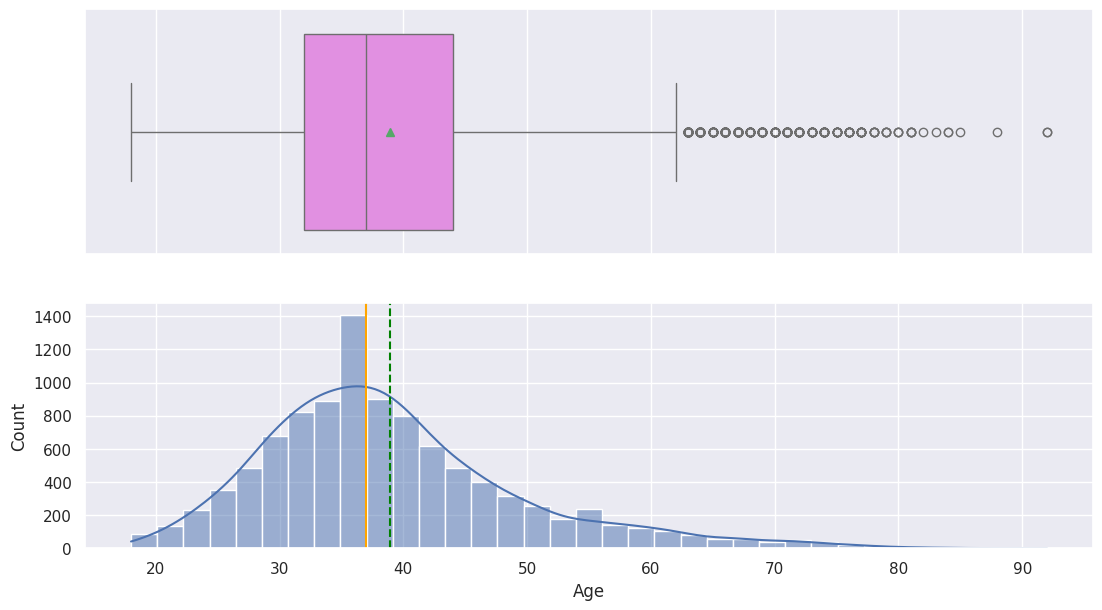

In [23]:
# Histogram/boxplot for Age column
hist_box(data1, 'Age', bins=35)

**Observations:**

Right skewed with outliers.

**Tenure**

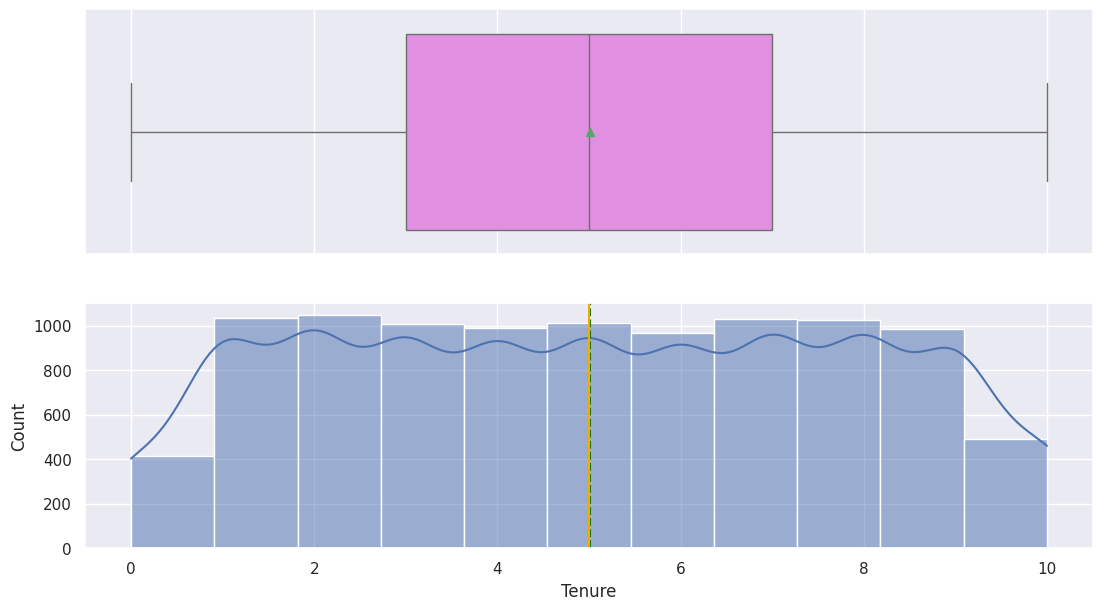

In [24]:
# Histogram/boxplot for Tenure column
hist_box(data1, 'Tenure', bins=11)

**Observations:**

The Tenure data is well balanced.

**Balance**

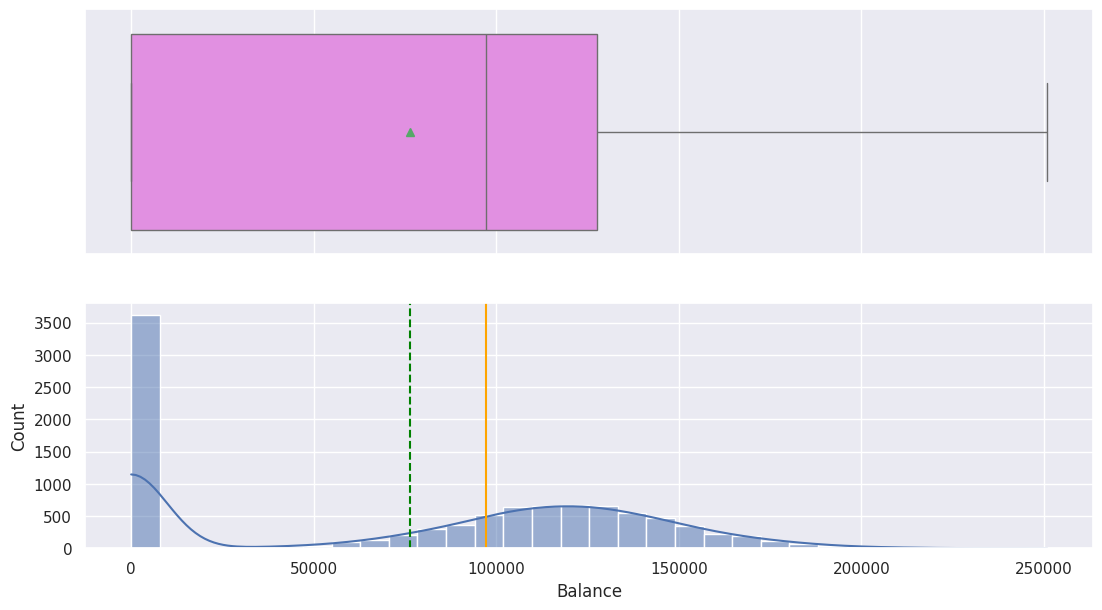

In [25]:
# Histogram/boxplot for Balance column
hist_box(data1, 'Balance', bins=32)

**Observations:**

Right skewed and a high average of 0 Balance.

**NumOfProducts**

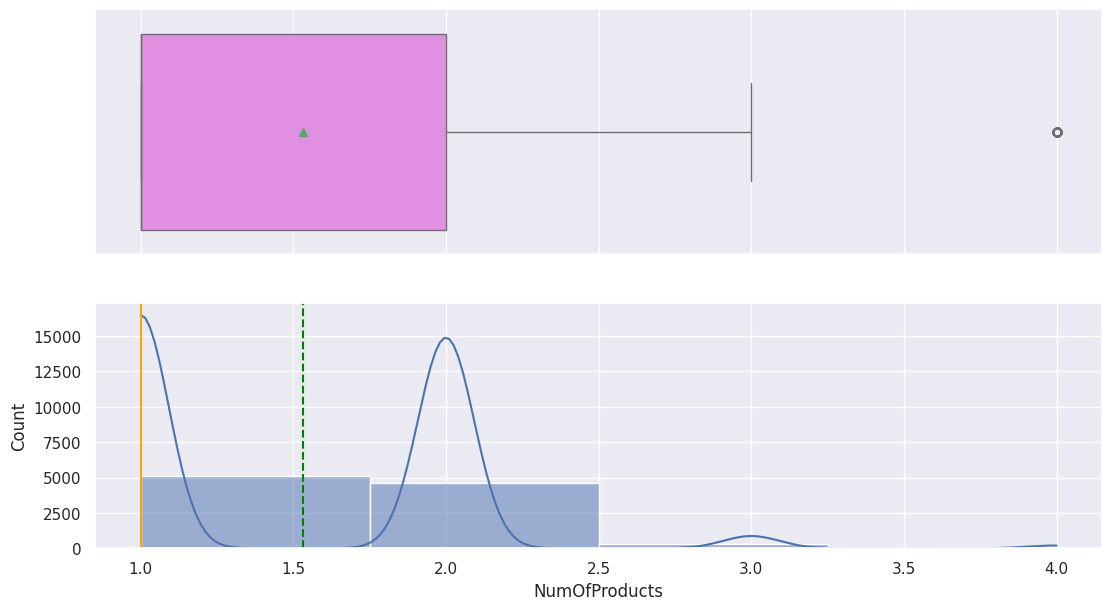

In [26]:
# Histogram/boxplot for NumOfProducts column
hist_box(data1, 'NumOfProducts', bins=4)

**Observations:**

Right skewed with outliers.

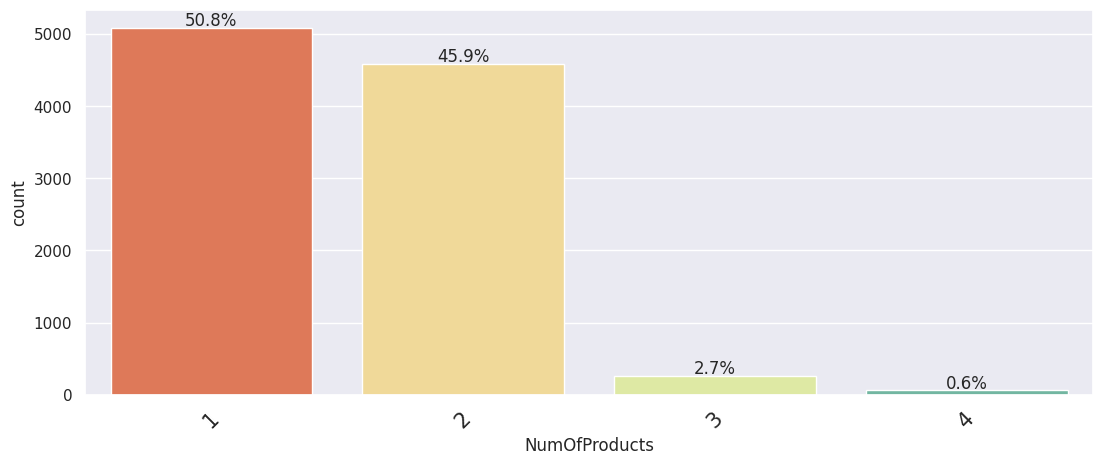

In [27]:
# Labeled barplot for NumOfProducts column
labeled_barplot(data1, "NumOfProducts", perc=True, n=10)

**Observations:**

Products 1 and 2 make up almost all of the product percentages.

**HasCrCard**

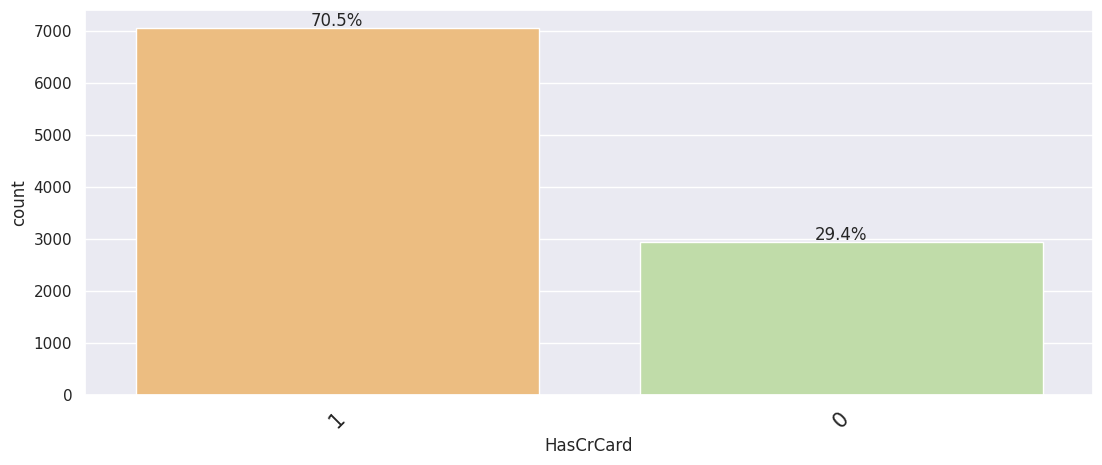

In [28]:
# Labeled barplot for HasCrCard column
labeled_barplot(data1, "HasCrCard", perc=True, n=10)

**Observations:**

HasCrCard has around 70 percent having a card.

**IsActiveMember**

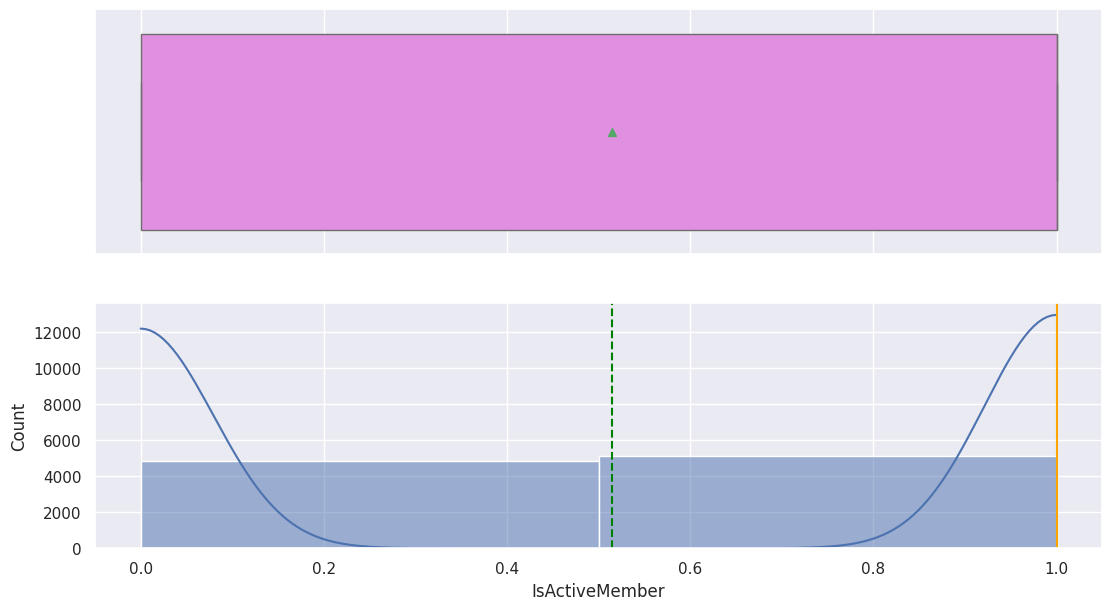

In [29]:
# Histogram/boxplot for IsActiveMember column
hist_box(data1, 'IsActiveMember', bins=2)

**Observations:**

Slightly right skewed with outliers.

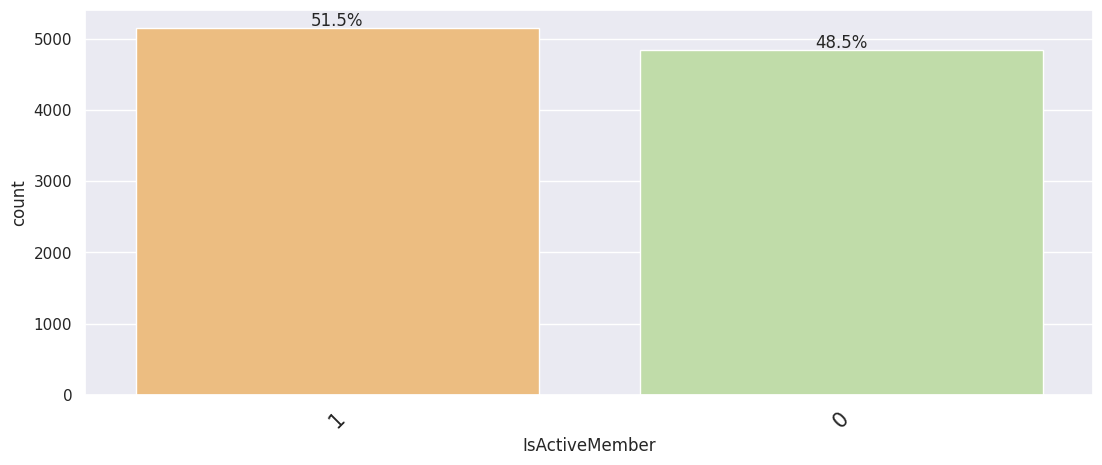

In [30]:
# Labeled barplot for IsActiveMember column
labeled_barplot(data1, "IsActiveMember", perc=True, n=10)

**Observations:**

IsActiveMember has a slightly higher percentage than those who are not active.

**EstimatedSalary**

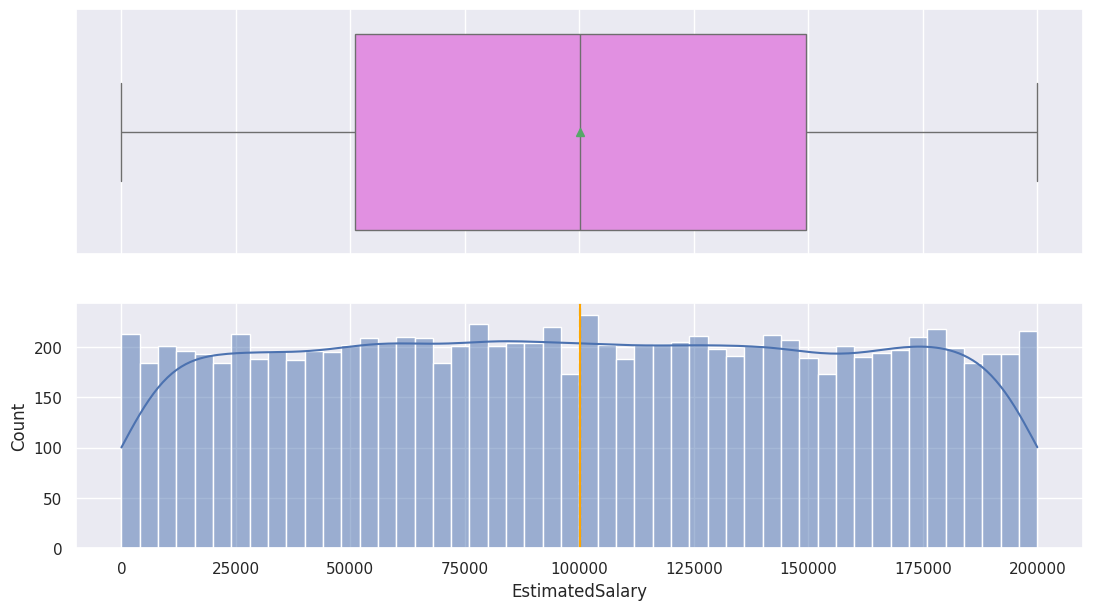

In [31]:
# Histogram/boxplot for EstimatedSalary column
hist_box(data1, 'EstimatedSalary', bins=50)

**Observations:**

EstimatedSalary is pretty balanced.

**Exited**

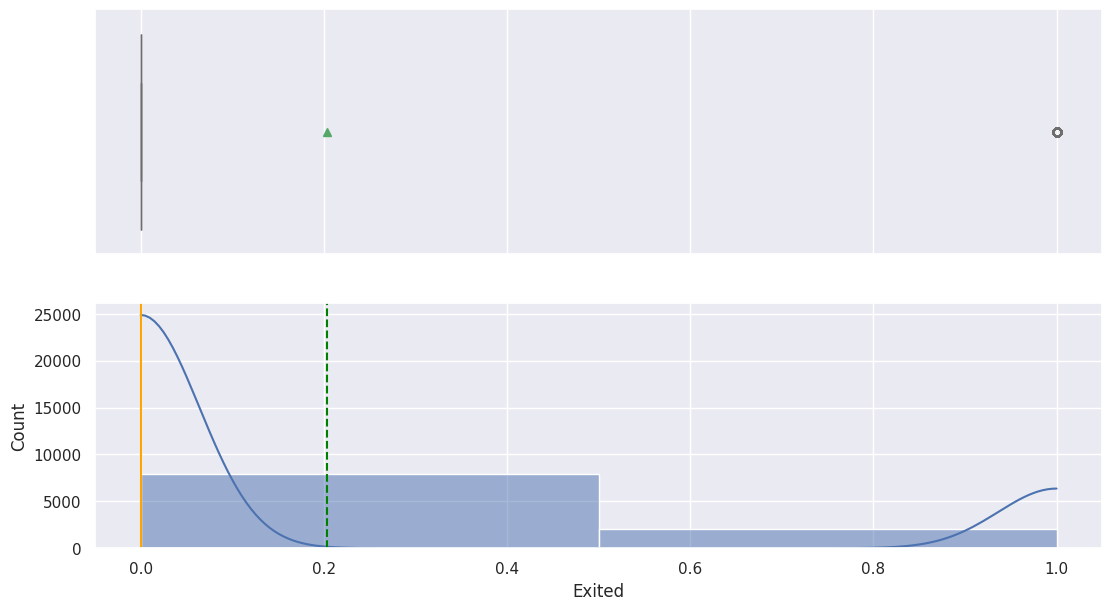

In [32]:
# Histogram/boxplot for Exited column
hist_box(data1, 'Exited', bins=2)

**Observations:**

Right skewed with outliers.

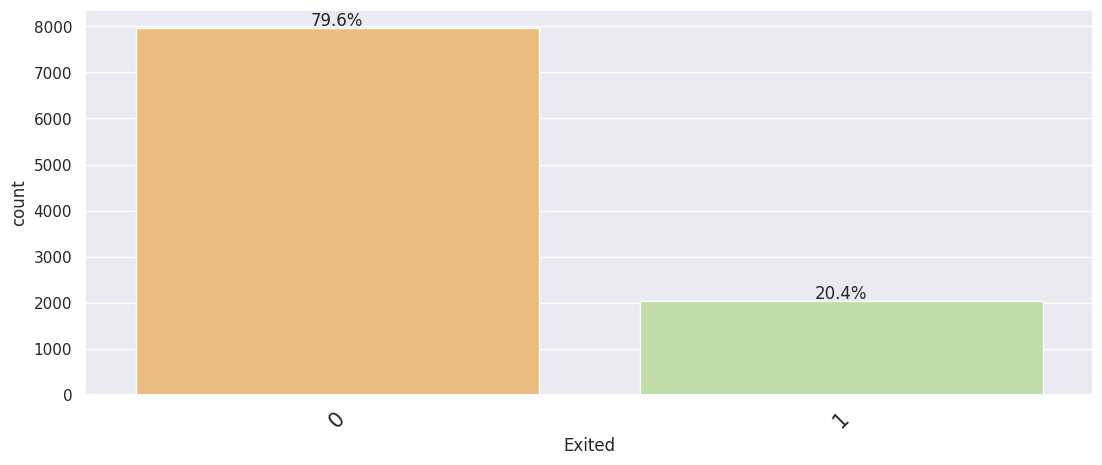

In [33]:
# Labeled barplot for Exited column
labeled_barplot(data1, "Exited", perc=True, n=10)

**Observations:**

The target value is really unbalanced.

### Bivariate Analysis

In [34]:
# Defining a bivariable boxplot for 1 categorical and 1 variable feature
def bivar_boxplot(data, featurex, featurey):

  plt.figure(figsize=(10, 5))
  sns.boxplot(data=data, x=featurex, y=featurey, showmeans=True, palette='Spectral')
  plt.xticks(rotation=45)
  plt.show()

In [35]:
# Stacked barplot to compare different categorical columns in the data.
def stacked_barplot(data, predictor, target):
  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]
  tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
  print(tab1)
  print("-" * 100)
  tab = pd.crosstab(data[predictor], data[target], normalize = 'index').sort_values(by=sorter, ascending=False)

  tab.plot(kind = 'bar', stacked = True, figsize = (count+3, 5), colormap = 'Accent')
  plt.legend(loc = 'upper left')
  plt.xticks(rotation=45)
  plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), frameon = True)

**Heatmap Correlation of Numerical Data**

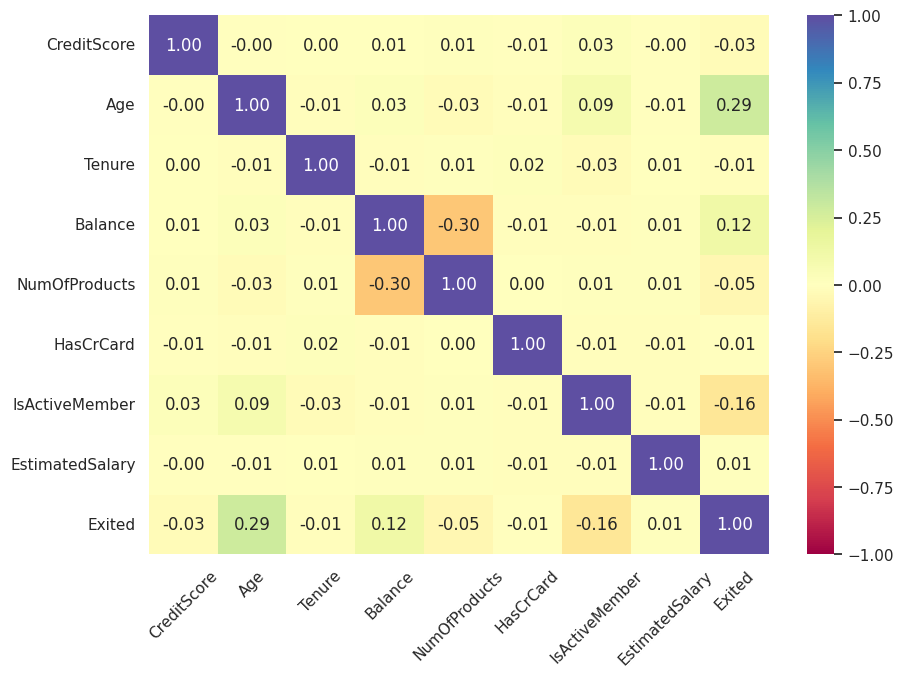

In [36]:
# Creating heatmap to show the correlation between the numerical columns

plt.figure(figsize=(10,7))
sns.heatmap(data1.corr(numeric_only=True), annot=True,fmt=".2f", cmap='Spectral', vmin=-1, vmax=1)
plt.xticks(rotation=45)
plt.show()

**Observations:**

There is a higher correlation between Age and Exited and Balance and Exited.  There is a higher negative correlation between NumOfProducts and Balance and IsActiveMember and Exited.

**Exited vs. CreditScore**

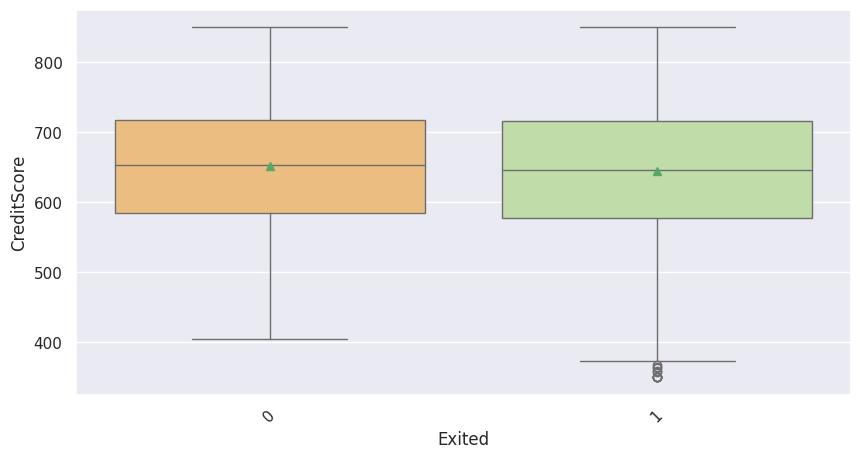

In [37]:
# Boxplot comparing categorical variable and numerical variable
bivar_boxplot(data1, 'Exited', 'CreditScore')

**Observations:**

CreditScore resultes are fairly similar beween people who exited and people who did not exit.  There are more outliers in the lower CreditScore area for the group who exited.

**Exited vs. Age**

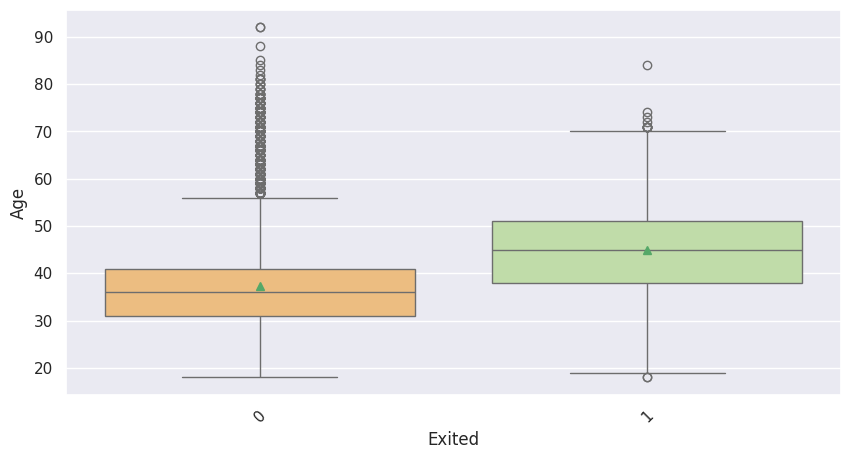

In [38]:
# Boxplot comparing categorical variable and numerical variable
bivar_boxplot(data1, 'Exited', 'Age')

**Observations:**

People who are in their late 30s, 40s, and early 50s are more likely to leave.

**Exited vs. Tenure**

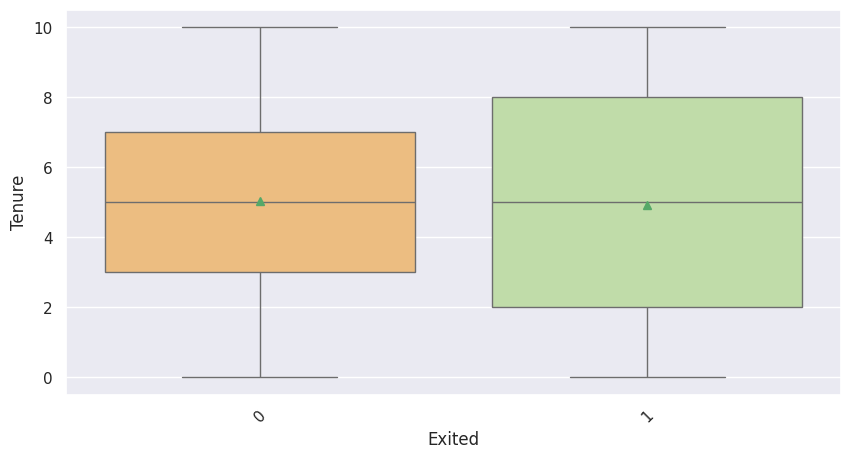

In [39]:
# Boxplot comparing categorical variable and numerical variable
bivar_boxplot(data1, 'Exited', 'Tenure')

**Observations:**

People who will leave has a higher range from around 2 years to 8 years, where people who will stay have a range from around 3 years to 7 years.

**Exited vs. Balance**

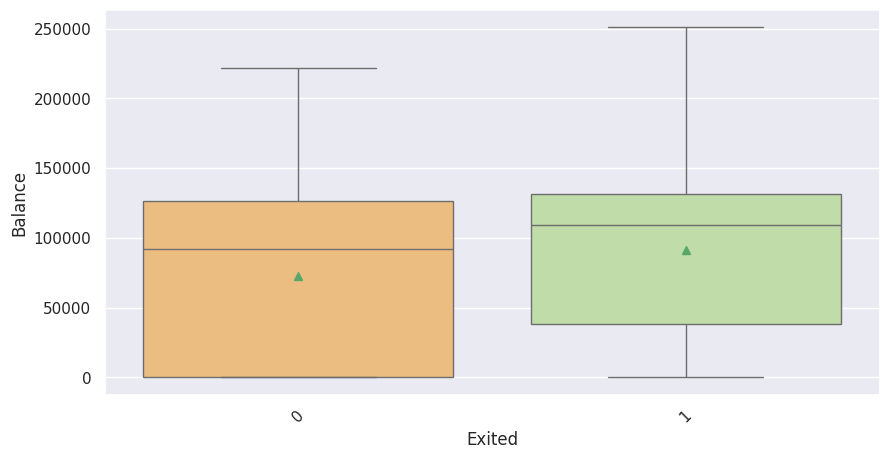

In [40]:
# Boxplot comparing categorical variable and numerical variable
bivar_boxplot(data1, 'Exited', 'Balance')

**Observations:**

People with a lower balance are more likely to stay.

**Exited vs. EstimatedSalary**

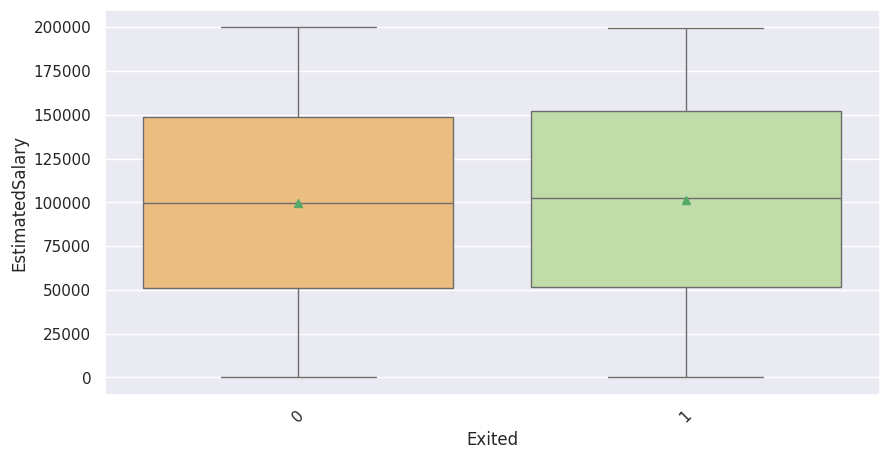

In [41]:
# Boxplot comparing categorical variable and numerical variable
bivar_boxplot(data1, 'Exited', 'EstimatedSalary')

**Observations:**

The Estimaged Salary ranges are very similar between both exited and not exited.

**Geography vs. Exited**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
----------------------------------------------------------------------------------------------------


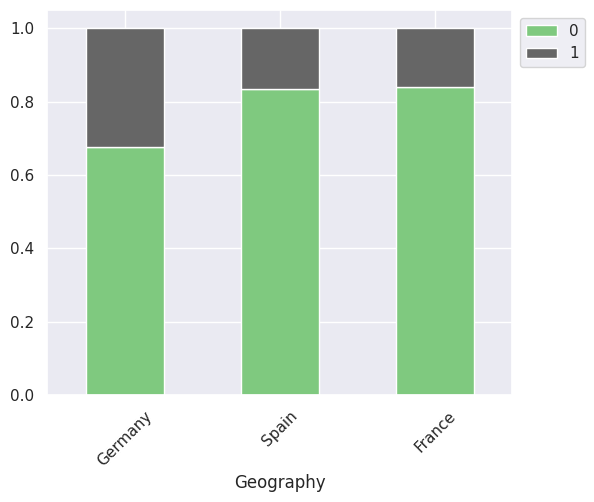

In [42]:
# Stacked barplot of 2 values, Geography and Exited
stacked_barplot(data1, "Geography", "Exited" )

**Observations:**

France makes up about half of the customers, while Germany and Spain are both around 25 percent of the customers.  Germany has a higher percentage of people who have exited.  While Germany and France have had almost the same number of people who have exit.

**Gender vs. Exited**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
----------------------------------------------------------------------------------------------------


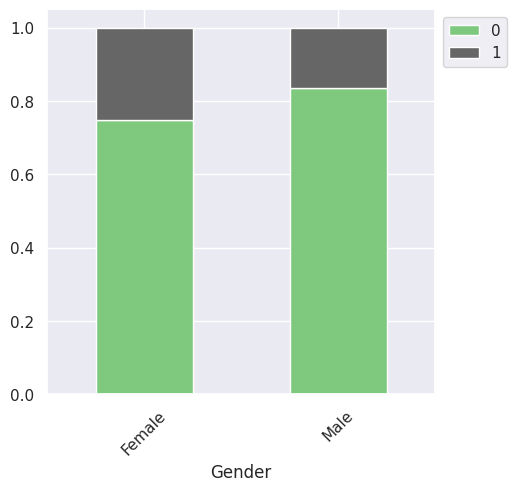

In [43]:
# Stacked barplot of 2 values, Gender and Exited
stacked_barplot(data1, "Gender", "Exited" )

**Observations:**

There is a slightly higer percentage of Males than Females.  A higher percentage of Females have exited he bank.

**NumOfProducts vs. Exited**

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
----------------------------------------------------------------------------------------------------


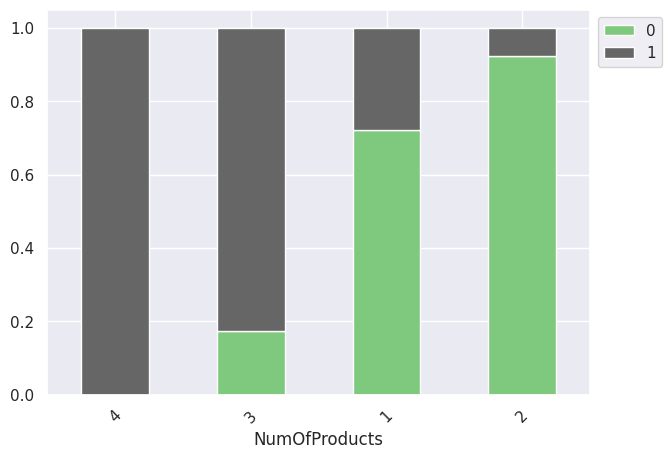

In [44]:
# Stacked barplot of 2 values, NumOfProducts and Exited
stacked_barplot(data1, "NumOfProducts", "Exited" )

**Observations:**

It seems the more products a customer has the more likely they are to exit the bank.

**HasCrCard vs. Exited**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
----------------------------------------------------------------------------------------------------


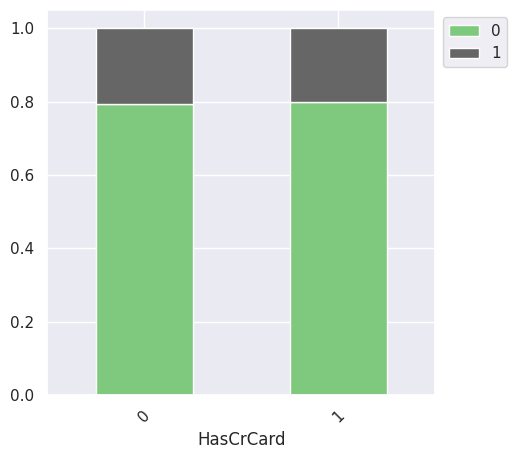

In [45]:
# Stacked barplot of 2 values, HasCrCard and Exited
stacked_barplot(data1, "HasCrCard", "Exited" )

**Observations:**

The percentage of customers exiting the bank is about the same for customer whether or not they have a credi card.  About 70 percent of the customers have credit cards.

**IsActiveMember vs. Exited**

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
----------------------------------------------------------------------------------------------------


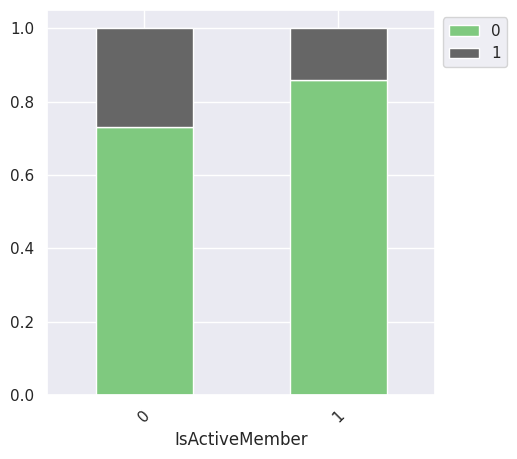

In [46]:
# Stacked barplot of 2 values, IsActiveMember and Exited
stacked_barplot(data1, "IsActiveMember", "Exited" )

**Observations:**

If a customer is and active member they are less likely to leave the bank.  A slightly higher pecentage of customers are active members.

**Pairplot of Numerical Data with a Hue = 'Exited'**

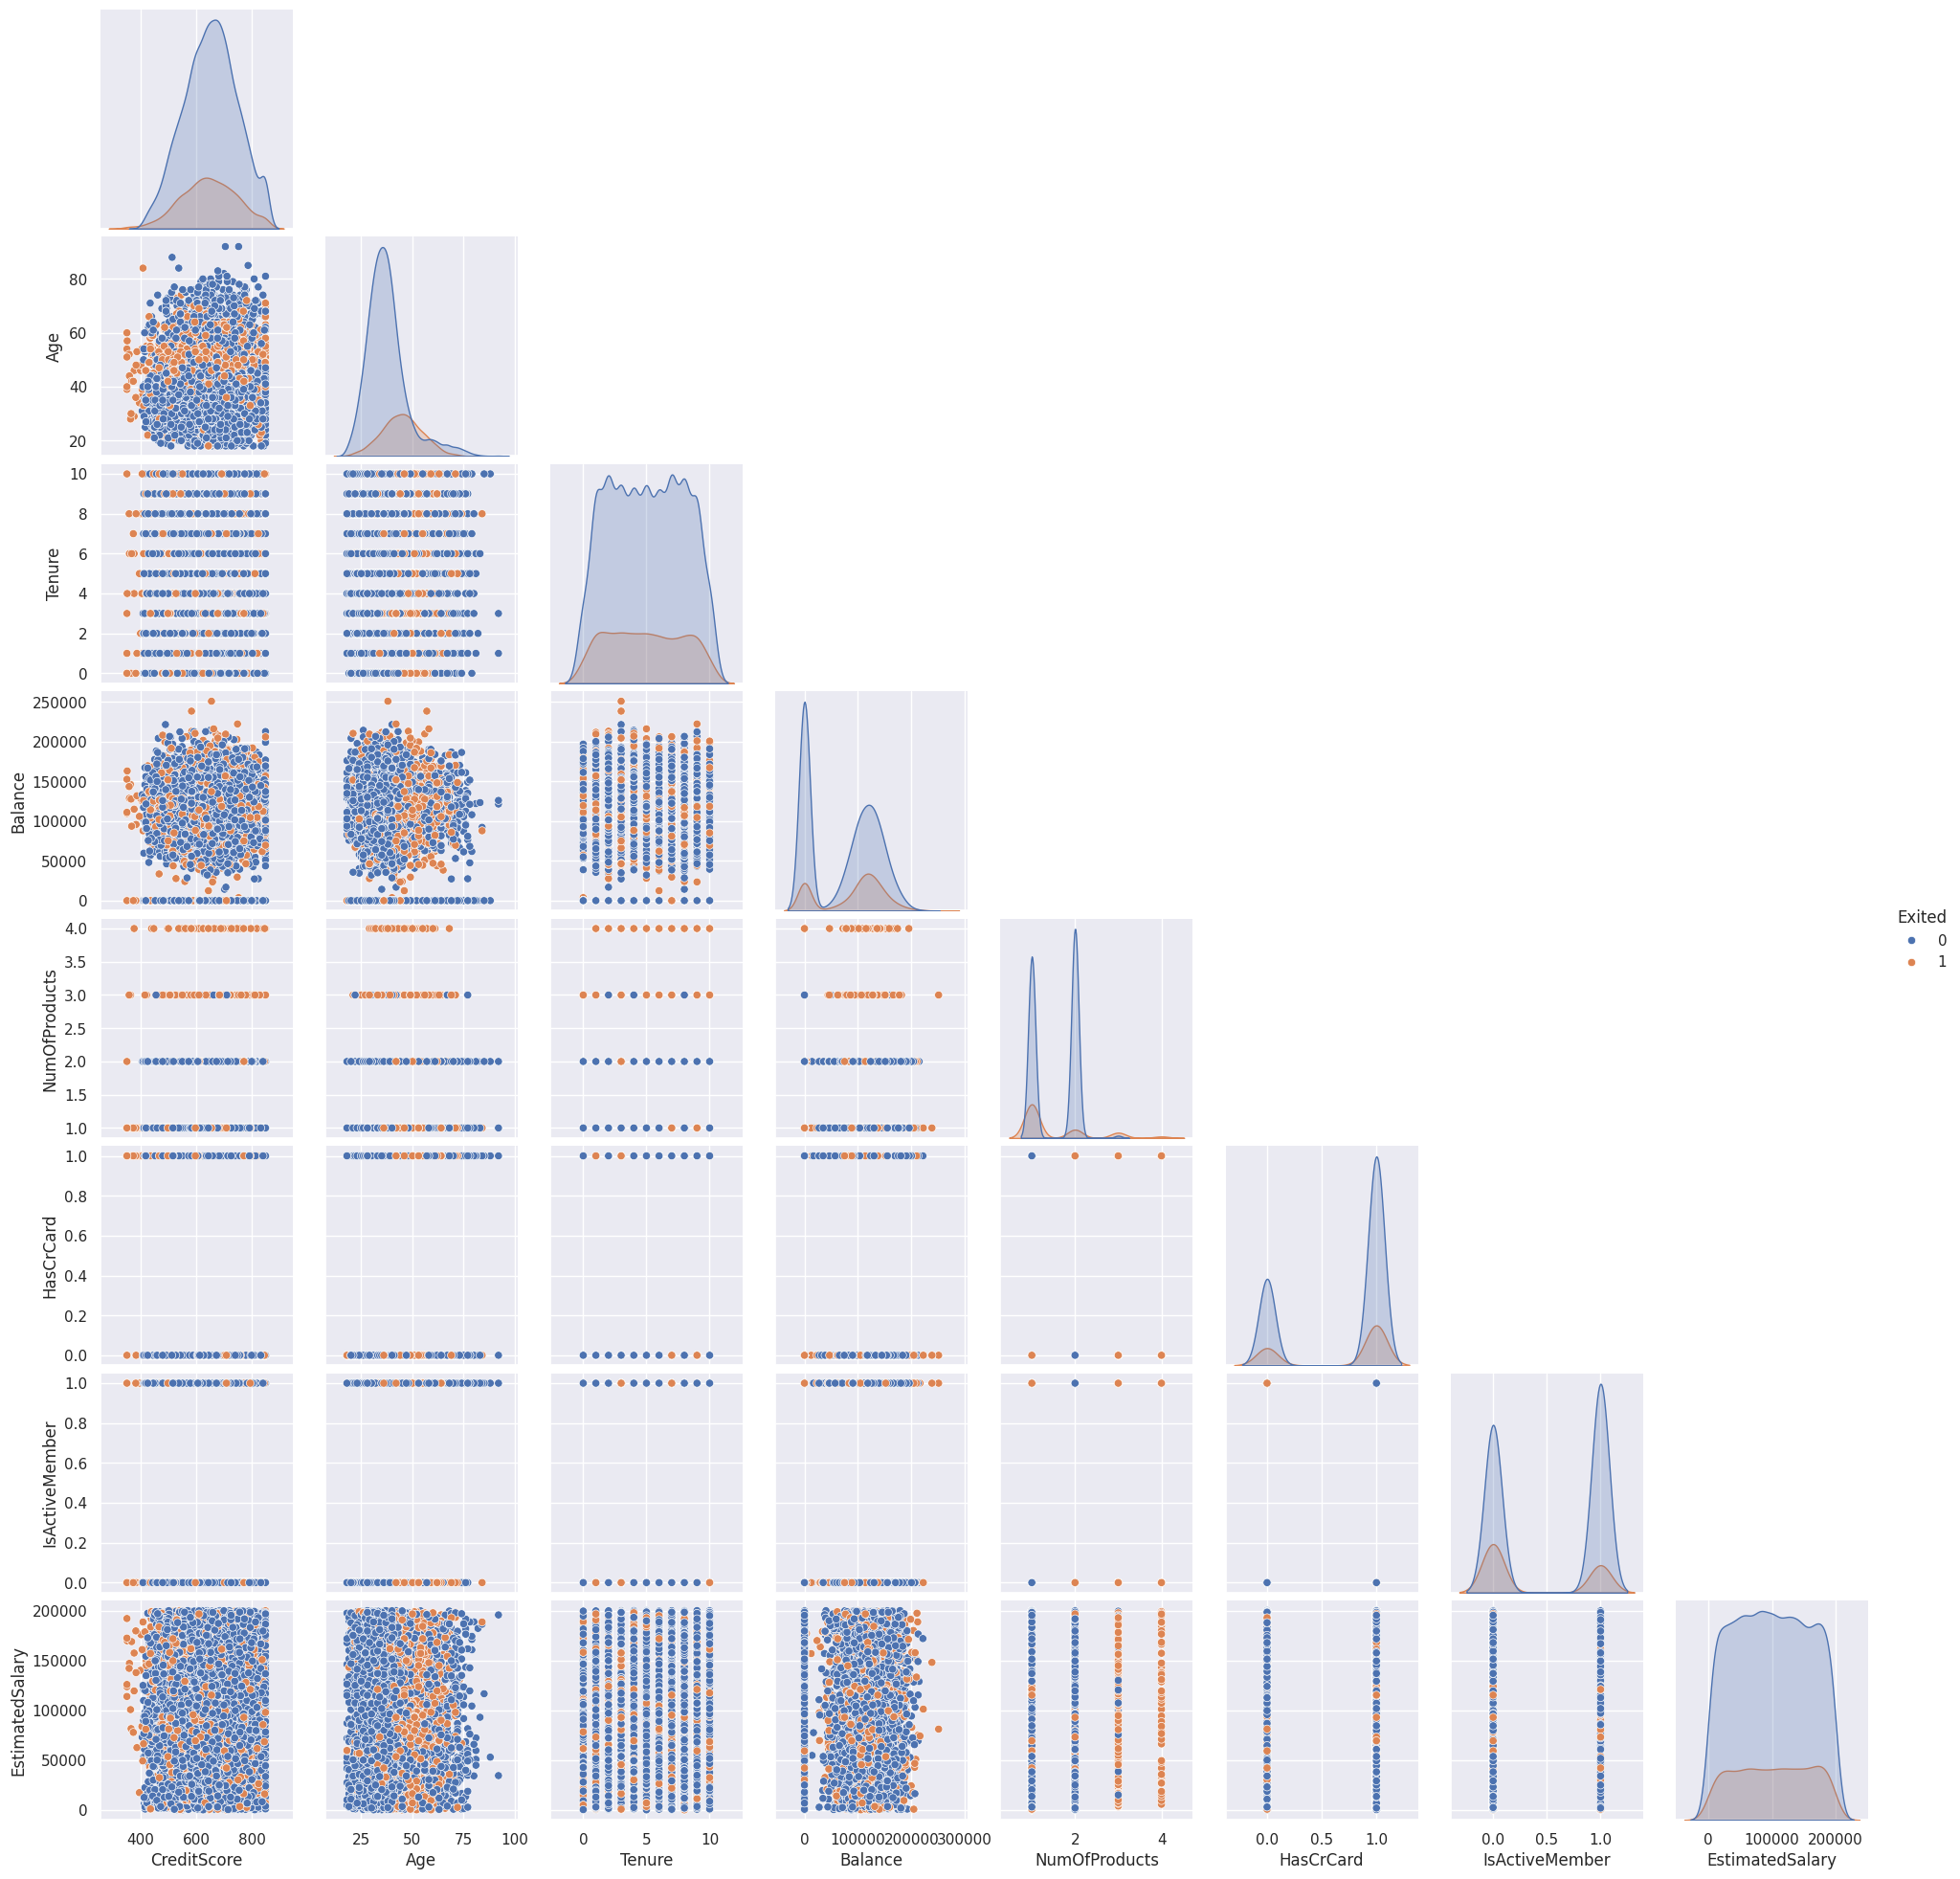

In [47]:
# Pairplot of numeric variables with a hue set to 'Exited'
sns.pairplot(data=data1, hue="Exited", corner=True);

**Observations:**

This pairplot shows the customers who have exited in orange for the different variables.

## Data Preprocessing

### Dummy Variable Creation

In [48]:
# Creating dummies columns for the object variables and hiding the first column of each
data1 = pd.get_dummies(data1,columns=data1.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

In [49]:
# Showing the first and last five rows fo the data
data1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1.0,0.0,1.0


### Train-validation-test Split

In [50]:
# Seperating the data into data for analysis and the target value
X = data1.drop(['Exited'],axis=1)
y = data1['Exited']

In [51]:
# Splitting the dataset into the Larger set and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42,stratify=y,shuffle = True)

In [52]:
# Splitting the dataset into the Training and Validation set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 1/3, random_state = 42,stratify=y_large, shuffle = True)

In [53]:
# Showing the shape for the x variables
print(X_train.shape, X_val.shape, X_test.shape)

(5000, 11) (2500, 11) (2500, 11)


In [54]:
# Showing the shape for the y variables
print(y_train.shape, y_val.shape, y_test.shape)

(5000,) (2500,) (2500,)


**Observations:**

The training set is 50 percent of the data and the validation and test data sets are both 25 pecent of the data.

In [55]:
# Showing the percentage of status 0 and 1 in the training and test data respectively
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print('-'*50, '\n\n')
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print('-'*50, '\n\n')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print('-'*50, '\n\n')

Percentage of classes in training set:
Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64
-------------------------------------------------- 


Percentage of classes in validation set:
Exited
0    0.7964
1    0.2036
Name: proportion, dtype: float64
-------------------------------------------------- 


Percentage of classes in test set:
Exited
0    0.7964
1    0.2036
Name: proportion, dtype: float64
-------------------------------------------------- 




**Observations:**

All 3 data sets have a very close percentage of both 0s and 1s.

In [56]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2559658377292138, 1: 4.906771344455349}

I was going to try class weights, but I could not get the code to work in the history function for the given example notebook or this notebook.  I do have a case open and am still waiting for help with this.

### Data Normalization

In [57]:
# Defining the list of numerical columns that have a larger number of unique values
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

In [58]:
# creating an instance of the standard scaler so that all the values are closer in size
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

In [59]:
# Showing the first and last five rows fo the data
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1563,-0.941238,0.096902,0.001319,1.006324,1,0,1,-1.160999,0.0,1.0,0.0
2879,1.032570,1.225422,0.348345,0.500914,1,1,0,0.471178,1.0,0.0,0.0
9236,-0.104178,0.755206,0.348345,0.206873,1,1,0,0.297722,0.0,1.0,1.0
8506,1.208250,0.849249,1.389422,-1.214564,2,0,1,1.329576,0.0,0.0,1.0
8501,0.288517,-0.937575,0.348345,-1.214564,2,1,0,-0.606320,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7399,0.185176,-0.185228,0.695371,0.838974,1,1,0,-0.123178,0.0,0.0,0.0
7739,0.763884,0.190946,0.001319,-1.214564,1,0,1,0.288439,0.0,1.0,1.0
2378,-0.290191,-0.091184,-0.345707,0.360013,1,1,1,0.196087,0.0,0.0,0.0
6709,2.065978,2.542029,-1.733811,0.814630,1,0,1,0.343818,1.0,0.0,0.0


## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

- Recall for the 1 variable would be the best metric, since this is a binary classification problem and we are trying to determine who will leave the bank in 6 months.


In [60]:
# Function to clear the backend and to set the random variable

def set_clear_random():

    backend.clear_session()
    #Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

In [61]:
# Function to show the model loss

def make_loss_model(history_values):

    #Plotting Train Loss vs Validation Loss
    plt.plot(history_values.history['loss'])
    plt.plot(history_values.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [62]:
# Function to show the recall

def make_recall_model(history_values):

    #Plotting Train recall vs Validation recall
    plt.plot(history_values.history['recall'])
    plt.plot(history_values.history['val_recall'])
    plt.title('Recall Model')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [63]:
# Collects the training recall data from each model to compare the differences

train_metric_df = pd.DataFrame(columns=["recall"])

In [64]:
# Function to collect the training recall data

def train_metric(model_name, train, train_pred):

    train_metric_df.loc[model_name] = recall_score(train, train_pred)

In [65]:
# Collects the validaton recall data from each model to compare the differences

valid_metric_df = pd.DataFrame(columns=["recall"])

In [66]:
# Function to collect the validation recall data

def valid_metric(model_name, val, val_pred):

    valid_metric_df.loc[model_name] = recall_score(val, val_pred)

In [67]:
# Collects the test recall data from each model to compare the differences

test_metric_df = pd.DataFrame(columns=["recall"])

In [68]:
# Function to collect the test recall data

def test_metric(model_name, test, test_pred):

    test_metric_df.loc[model_name] = recall_score(test, test_pred)

In [69]:
# Collects the history time data from each model to compare the differences

history_time__df = pd.DataFrame(columns=["Time taken in seconds"])

In [70]:
# Function to collect the history time data

def history_time(model_name, time_taken):

    history_time__df.loc[model_name] = time_taken

In [71]:
# Function to create a confusion matrix on the model data

def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """

    print(classification_report(actual_targets, predicted_targets))

    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", xticklabels = ['Not Exited', 'Exited'], yticklabels = ['Not Exited', 'Exited'])
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [72]:
# Function to show the collected training recall data

def train_pred(model, X_train):

    y_train_pred = model.predict(X_train)
    #Predicting the results using 0.5 as the threshold
    y_train_pred = (y_train_pred > 0.5)

    return y_train_pred

In [73]:
# Function to show the collected validation recall data

def val_pred(model, X_val):

    y_val_pred = model.predict(X_val)
    #Predicting the results using 0.5 as the threshold
    y_val_pred = (y_val_pred > 0.5)

    return y_val_pred

In [74]:
# Function to show the collected history time data

def test_pred(model, X_test):

    y_test_pred = model.predict(X_test)
    #Predicting the results using 0.5 as the threshold
    y_test_pred = (y_test_pred > 0.5)

    return y_test_pred

### Neural Network with SGD Optimizer

In [75]:
# Clearing the backend and setting the random variable

set_clear_random()

In [76]:
# Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 32 neurons and tanh as activation function
model_0.add(Dense(32, activation='tanh', input_dim = X_train.shape[1]))
# Adding a hidden layer with 16 neurons and tanh as activation function
model_0.add(Dense(16, activation='tanh'))
# Adding an output layer with 1 neuron and sigmoid as activation function
model_0.add(Dense(1, activation = 'sigmoid'))

In [77]:
# Using the SGD optimizer with a 0.04 learning rate and a momentum of 0.9
optimizer = tf.keras.optimizers.SGD(0.04, momentum=0.9)

# Using the Recall metric
metric = keras.metrics.Recall()

In [78]:
# Using the binary_crossentropy loss function with the optimizer and metric listed above
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [79]:
# Showing the Output Shape and Paramerter #s of the model
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 929 (3.63 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# Setting the number of epochs and batch_size

epochs = 150
batch_size = 256

In [81]:
# Running the epochs with parameters from above, while collecting the start and end times

start = time.time()
#history_0 = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, verbose=1, class_weight=cw_dict)
history_0 = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, verbose=1)
end=time.time()

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.5886 - recall: 0.1848 - val_loss: 0.4580 - val_recall: 0.0609
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.4574 - recall: 0.1416 - val_loss: 0.4479 - val_recall: 0.1198
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.4441 - recall: 0.1321 - val_loss: 0.4388 - val_recall: 0.1984
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4327 - recall: 0.1675 - val_loss: 0.4339 - val_recall: 0.2043
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4268 - recall: 0.2010 - val_loss: 0.4307 - val_recall: 0.2083
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4225 - recall: 0.2139 - val_loss: 0.4282 - val_recall: 0.2240
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4188 - recall: 0.2409 - val_loss: 0.4257 - val_recall: 0.2377
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4156 - recall: 0.2539 - val_loss: 0.4232 - val_recall: 0.2436
Epoch 9/150
2

In [82]:
# Printing the time taken to run the model

print("Time taken in seconds ",end-start)

Time taken in seconds  26.305156469345093


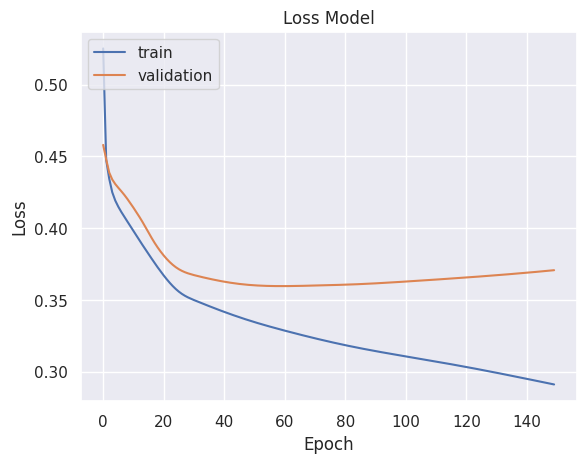

In [83]:
# Showing the Loss Model
make_loss_model(history_0)

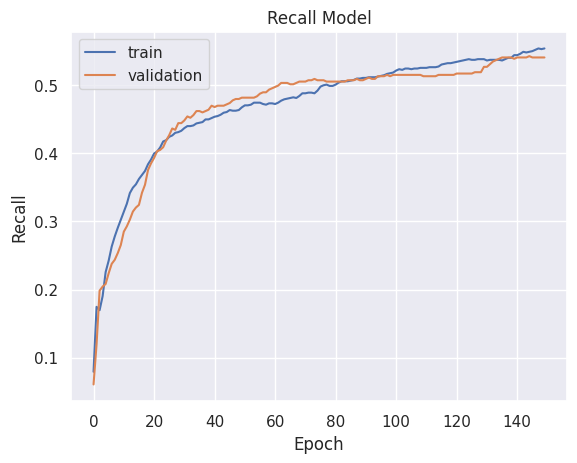

In [84]:
# Showing the Recall Model
make_recall_model(history_0)

In [85]:
# Collecting the training recall data for this model
y_train_pred = train_pred(model_0, X_train)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [86]:
# Collecting the validation recall data for this model
y_val_pred = val_pred(model_0, X_val)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [87]:
# Collecting the model_name and calculating the time taken to run the model
model_name = "NN with SGD"
time_taken = end-start

In [88]:
# Adding to the function to show the collected training recall data
train_metric(model_name, y_train, y_train_pred)

In [89]:
# Adding to the function to show the collected validation recall data
valid_metric(model_name, y_val, y_val_pred)

In [90]:
# Adding to the function to show the collected history time data
history_time(model_name, time_taken)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      3981
           1       0.76      0.59      0.66      1019

    accuracy                           0.88      5000
   macro avg       0.83      0.77      0.79      5000
weighted avg       0.87      0.88      0.87      5000



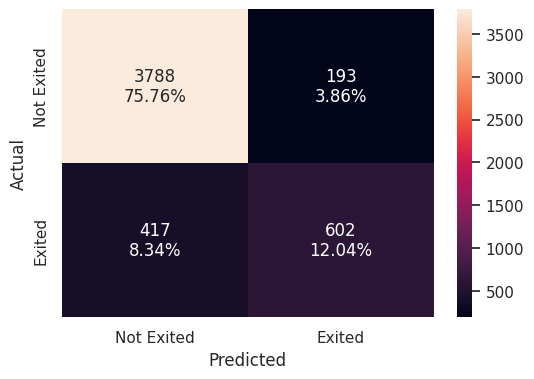

In [91]:
# Calculating the confusion matrix for the Training data
make_confusion_matrix(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1991
           1       0.66      0.54      0.60       509

    accuracy                           0.85      2500
   macro avg       0.78      0.73      0.75      2500
weighted avg       0.84      0.85      0.84      2500



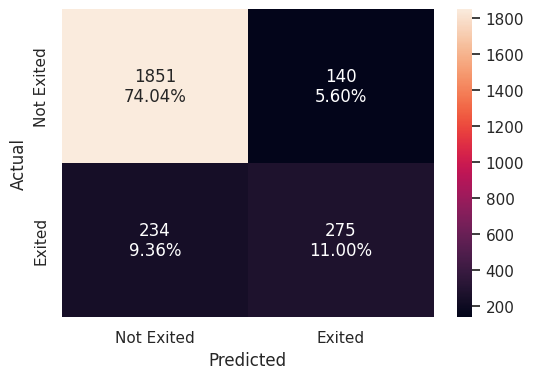

In [92]:
# Calculating the confusion matrix for the Validation data
make_confusion_matrix(y_val, y_val_pred)

**Observations:**

With the SDG Optimizer, I was able to get the traning data to 59 percent and the validation data to 54 percent for the 1s recall values.  The Recall curve for both the training data and validation data overlap well.



## Model Performance Improvement

### Neural Network with Adam Optimizer

In [95]:
# Clearing the backend and setting the random variable
set_clear_random()

In [96]:
# Initializing the neural network
model_1 = Sequential()
# Adding the input layer with 16 neurons and tanh as activation function
model_1.add(Dense(16,activation='tanh',input_dim = X_train.shape[1]))
# Adding the input layer with 8 neurons and tanh as activation function
model_1.add(Dense(8,activation='tanh'))
# Adding an output layer with 1 neuron and sigmoid as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [97]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.005)

# Using the Recall metric
metric = keras.metrics.Recall()

In [98]:
# Using the binary_crossentropy loss function with the optimizer and metric listed above
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [99]:
# Showing the Output Shape and Paramerter #s of the model

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
# Setting the number of epochs and batch_size

epochs = 200
batch_size = 512

In [101]:
# Running the epochs with parameters from above, while collecting the start and end times

start = time.time()
history_1 = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, verbose=1)
end=time.time()

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.6134 - recall: 0.1393 - val_loss: 0.4930 - val_recall: 0.0059
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4835 - recall: 0.0027 - val_loss: 0.4604 - val_recall: 0.0138
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4550 - recall: 0.0378 - val_loss: 0.4455 - val_recall: 0.1238
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4424 - recall: 0.1416 - val_loss: 0.4396 - val_recall: 0.1984
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4351 - recall: 0.1752 - val_loss: 0.4363 - val_recall: 0.2102
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4302 - recall: 0.1866 - val_loss: 0.4340 - val_recall: 0.2377
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4259 - recall: 0.2057 - val_loss: 0.4319 - val_recall: 0.2377
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4225 - recall: 0.2191 - val_loss: 0.4304 - val_recall: 0.2495
Epoch 9/200
1

In [102]:
# Printing the time taken to run the model

print("Time taken in seconds ",end-start)

Time taken in seconds  29.177990674972534


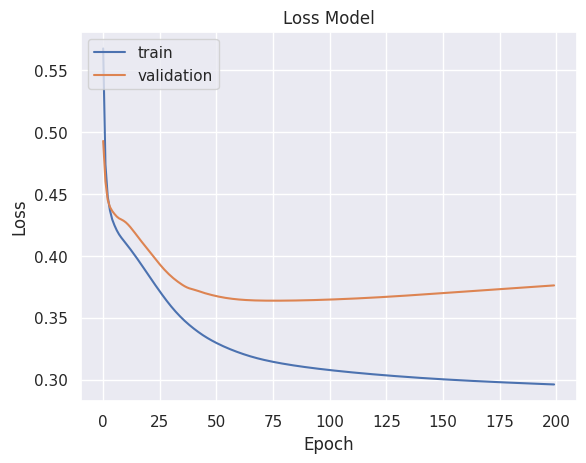

In [103]:
# Showing the Loss Model
make_loss_model(history_1)

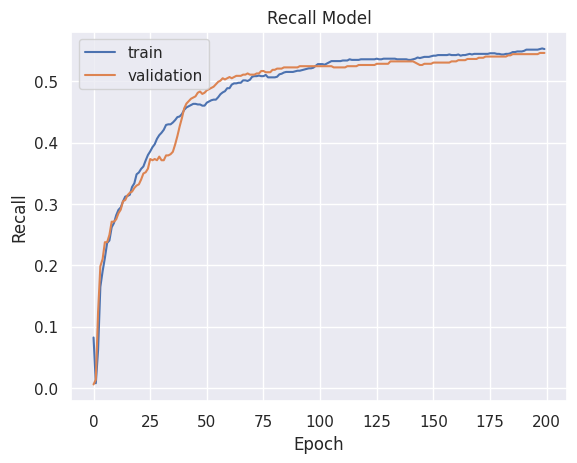

In [104]:
# Showing the Recall Model
make_recall_model(history_1)

In [105]:
# Collecting the training recall data for this model
y_train_pred = train_pred(model_1, X_train)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [106]:
# Collecting the validation recall data for this model
y_val_pred = val_pred(model_1, X_val)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [107]:
# Collecting the model_name and calculating the time taken to run the model
model_name = "NN with Adam"
time_taken = end-start

In [108]:
# Adding to the function to show the collected training recall data
train_metric(model_name, y_train, y_train_pred)

In [109]:
# Adding to the function to show the collected validation recall data
valid_metric(model_name, y_val, y_val_pred)

In [110]:
# Adding to the function to show the collected history time data
history_time(model_name, time_taken)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3981
           1       0.74      0.59      0.66      1019

    accuracy                           0.87      5000
   macro avg       0.82      0.77      0.79      5000
weighted avg       0.87      0.87      0.87      5000



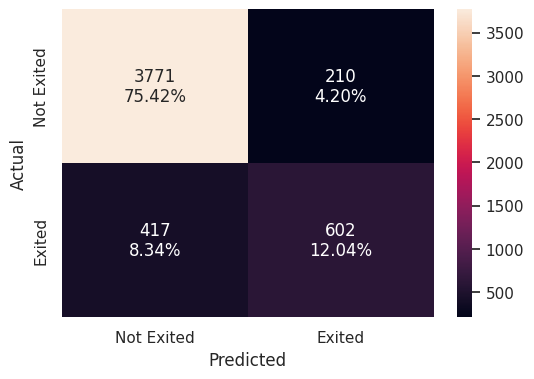

In [111]:
# Calculating the confusion matrix for the Training data
make_confusion_matrix(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1991
           1       0.63      0.55      0.58       509

    accuracy                           0.84      2500
   macro avg       0.76      0.73      0.74      2500
weighted avg       0.84      0.84      0.84      2500



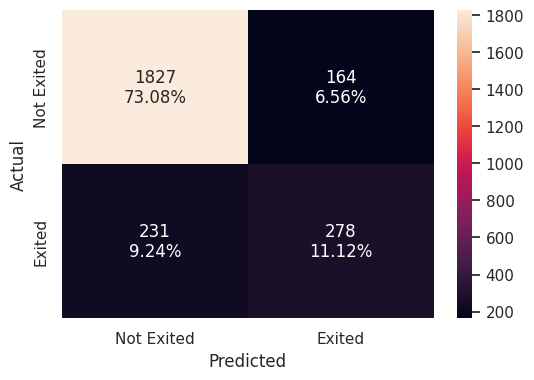

In [112]:
# Calculating the confusion matrix for the Validation data
make_confusion_matrix(y_val,y_val_pred)

**Observations:**

With the Adam Optimizer, I was able to get the traning data to 59 percent and the validation data to 55 percent for the 1s recall values.  The Recall curve for both the training data and validation data overlap well.

### Neural Network with Adam Optimizer and Dropout

In [113]:
# Clearing the backend and setting the random variable

set_clear_random()

In [114]:
# Initializing the neural network
model_2 = Sequential()
# Adding the input layer with 32 neurons and tanh as activation function
model_2.add(Dense(32,activation='tanh',input_dim = X_train.shape[1]))
# Adding a dropout with ratio of 0.05
model_2.add(Dropout(0.05))
# Adding the input layer with 8 neurons and tanh as activation function
model_2.add(Dense(8,activation='tanh'))
# Adding the input layer with 16 neurons and tanh as activation function
model_2.add(Dense(16,activation='tanh'))
# Adding a dropout with ratio of 0.05
model_2.add(Dropout(0.05))
# Adding the input layer with 8 neurons and tanh as activation function
model_2.add(Dense(8,activation='tanh'))
# Adding an output layer with 1 neuron and sigmoid as activation function
model_2.add(Dense(1, activation = 'sigmoid'))

In [115]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.001)

# Using the Recall metric
metric = keras.metrics.Recall()

In [116]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [117]:
# Showing the Output Shape and Paramerter #s of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 937 (3.66 KB)

 Trainable params: 937 (3.66 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
# Setting the number of epochs and batch_size

epochs = 500
batch_size = 256

In [119]:
# Running the epochs with parameters from above, while collecting the start and end times

start = time.time()
history_2 = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, verbose=1)
end=time.time()

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.5275 - recall: 0.2088 - val_loss: 0.4550 - val_recall: 0.0648
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4590 - recall: 0.1032 - val_loss: 0.4407 - val_recall: 0.2122
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4486 - recall: 0.2132 - val_loss: 0.4377 - val_recall: 0.2181
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4472 - recall: 0.2039 - val_loss: 0.4346 - val_recall: 0.2475
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4430 - recall: 0.2242 - val_loss: 0.4326 - val_recall: 0.2358
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4389 - recall: 0.2119 - val_loss: 0.4307 - val_recall: 0.2456
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4331 - recall: 0.2358 - val_loss: 0.4288 - val_recall: 0.2515
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4321 - recall: 0.2411 - val_loss: 0.4267 - val_recall: 0.2554
Epoch 9/500
20/

In [120]:
# Printing the time taken to run the model

print("Time taken in seconds ",end-start)

Time taken in seconds  102.01214218139648


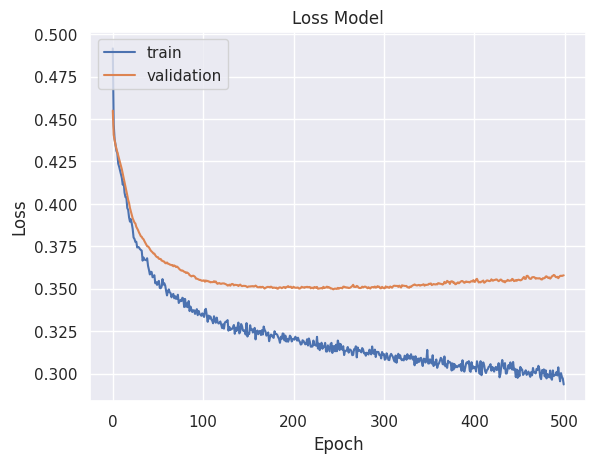

In [121]:
# Showing the Loss Model
make_loss_model(history_2)

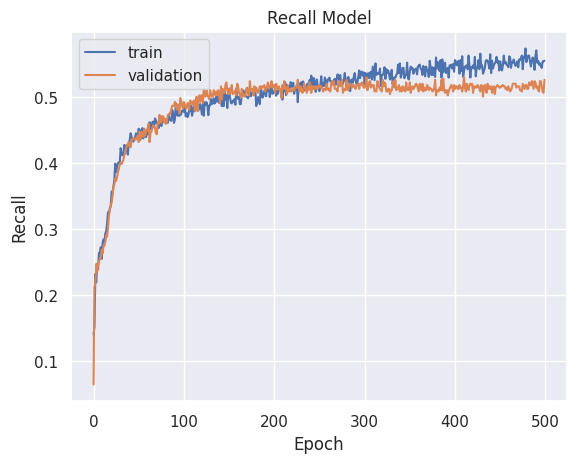

In [122]:
# Showing the Recall Model
make_recall_model(history_2)

In [123]:
# Collecting the training recall data for this model
y_train_pred = train_pred(model_2, X_train)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [124]:
# Collecting the validation recall data for this model
y_val_pred = val_pred(model_2, X_val)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [125]:
# Collecting the model_name and calculating the time taken to run the model
model_name = "NN with Adam & Dropout"
time_taken = end-start

In [126]:
# Adding to the function to show the collected training recall data
train_metric(model_name, y_train, y_train_pred)

In [127]:
# Adding to the function to show the collected validation recall data
valid_metric(model_name, y_val, y_val_pred)

In [128]:
# Adding to the function to show the collected history time data
history_time(model_name, time_taken)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3981
           1       0.80      0.57      0.67      1019

    accuracy                           0.88      5000
   macro avg       0.85      0.77      0.80      5000
weighted avg       0.88      0.88      0.88      5000



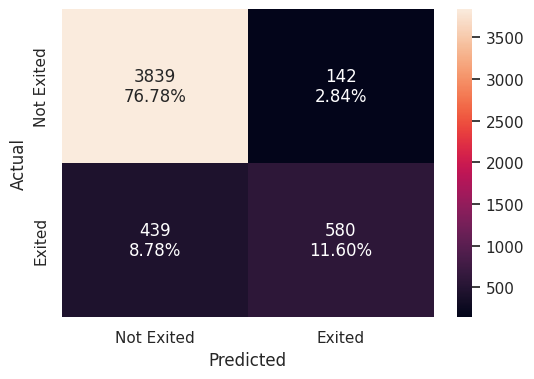

In [129]:
#Calculating the confusion matrix for the Training data
make_confusion_matrix(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1991
           1       0.70      0.53      0.60       509

    accuracy                           0.86      2500
   macro avg       0.79      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



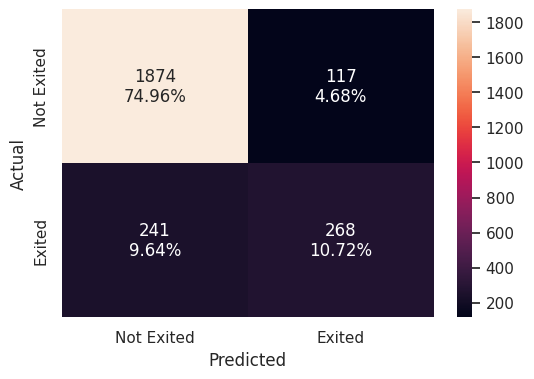

In [130]:
#Calculating the confusion matrix for the Validation data
make_confusion_matrix(y_val,y_val_pred)

**Observations:**

With the Adam Optimizer with Dropout, I was able to get the traning data to 57 percent and the validation data to 53 percent for the 1s recall values, which are lower values than the first 2 models.  The Recall curve for both the training data and validation data overlap well.  When you look at the curve data there is more noise/oscillation of the data.

### Neural Network with Balanced Data (by applying SMOTE) Functions

In [131]:
# sm  = SMOTE(ratio=1, random_state=88)
sm  = SMOTE(random_state=88)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (7962, 11)
After UpSampling, the shape of train_y: (7962,) 



**Observations:**

The new SMOTE data set shape.

In [132]:
# Showing the percentage of status 0 and 1 in the training and test data respectively
print("Count and Percentage of classes in training set:")
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print('-'*50, '\n\n')

Count and Percentage of classes in training set:
Exited
0    3981
1    1019
Name: count, dtype: int64
Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64
-------------------------------------------------- 




**Observations:**

Orignial data set split percentages.

In [133]:
# Showing the percentage of status 0 and 1 in the training and test data respectively
print("Count and Percentage of classes in training set:")
print(y_train_smote.value_counts())
print(y_train_smote.value_counts(normalize=True))
print('-'*50, '\n\n')

Count and Percentage of classes in training set:
Exited
0    3981
1    3981
Name: count, dtype: int64
Exited
0    0.5
1    0.5
Name: proportion, dtype: float64
-------------------------------------------------- 




**Observations:**

The new SMOTE data set split percentage.  The data set is now balanced.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [134]:
# Clearing the backend and setting the random variable

set_clear_random()

In [135]:
# Initializing the model
model_3 = Sequential()
# Adding the input layer with 8 neurons and tanh as activation function
model_3.add(Dense(8,activation='tanh',input_dim = X_train_smote.shape[1]))
# Adding the input layer with 8 neurons and tanh as activation function
model_3.add(Dense(8,activation='tanh'))
# Adding the input layer with 8 neurons and tanh as activation function
model_3.add(Dense(8,activation='tanh'))
# Adding an output layer with 1 neuron and sigmoid as activation function
model_3.add(Dense(1, activation = 'sigmoid'))

In [136]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.06)

# Using the Recall metric
metric = keras.metrics.Recall()

In [137]:
# Using the binary_crossentropy loss function with the optimizer and metric listed above
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [138]:
# Showing the Output Shape and Paramerter #s of the model
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249 (996.00 B)

 Trainable params: 249 (996.00 B)

 Non-trainable params: 0 (0.00 B)

In [139]:
# Setting the number of epochs and batch_size

epochs = 77
batch_size = 256

In [140]:
# Running the epochs with parameters from above, while collecting the start and end times

start = time.time()
history_3 = model_3.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, verbose=1)
end=time.time()

Epoch 1/77
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6999 - recall: 0.5677 - val_loss: 0.6786 - val_recall: 0.6228
Epoch 2/77
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6546 - recall: 0.6610 - val_loss: 0.6564 - val_recall: 0.6267
Epoch 3/77
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6326 - recall: 0.6644 - val_loss: 0.6376 - val_recall: 0.6523
Epoch 4/77
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6118 - recall: 0.6754 - val_loss: 0.6205 - val_recall: 0.6739
Epoch 5/77
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5913 - recall: 0.6893 - val_loss: 0.6081 - val_recall: 0.6935
Epoch 6/77
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5748 - recall: 0.7052 - val_loss: 0.6017 - val_recall: 0.6916
Epoch 7/77
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5641 - recall: 0.7146 - val_loss: 0.5995 - val_recall: 0.7053
Epoch 8/77
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5579 - recall: 0.7187 - val_loss: 0.5990 - val_recall: 0.7053
Epoch 9/77
32/32 ━━━━━━

In [141]:
# Printing the time taken to run the model

print("Time taken in seconds ",end-start)

Time taken in seconds  14.37221622467041


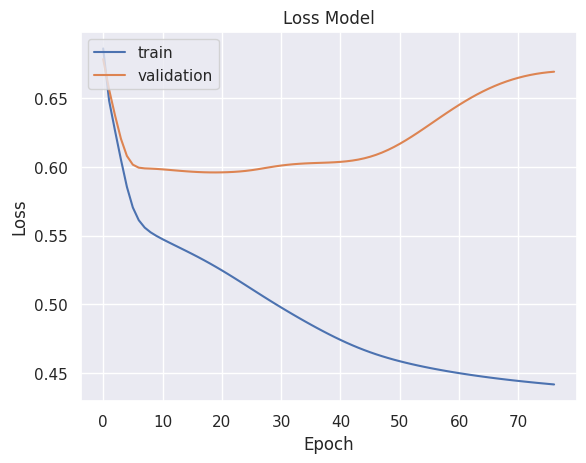

In [142]:
# Showing the Loss Model
make_loss_model(history_3)

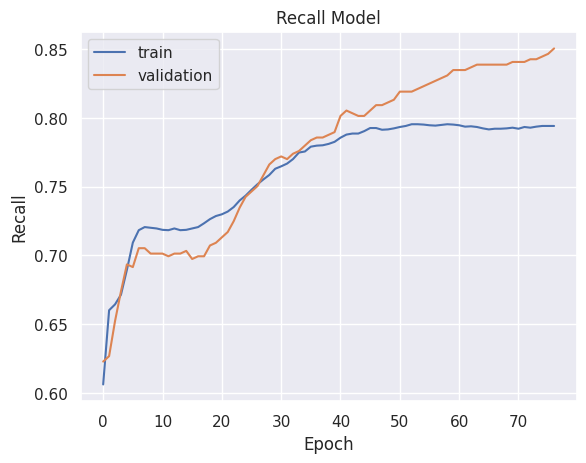

In [143]:
# Showing the Recall Model
make_recall_model(history_3)

In [144]:
# Collecting the training recall data for this model
y_train_pred = train_pred(model_3, X_train_smote)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [145]:
# Collecting the validation recall data for this model
y_val_pred = val_pred(model_3, X_val)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [146]:
# Collecting the model_name and calculating the time taken to run the model
model_name = "NN with SMOTE & SGD"
time_taken = end-start

In [147]:
# Adding to the function to show the collected training recall data
train_metric(model_name, y_train_smote, y_train_pred)

In [148]:
# Adding to the function to show the collected validation recall data
valid_metric(model_name, y_val, y_val_pred)

In [149]:
# Adding to the function to show the collected history time data
history_time(model_name, time_taken)

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      3981
           1       0.71      0.90      0.79      3981

    accuracy                           0.77      7962
   macro avg       0.79      0.77      0.76      7962
weighted avg       0.79      0.77      0.76      7962



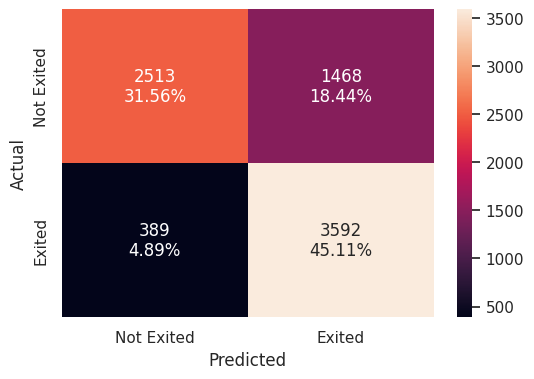

In [150]:
# Calculating the confusion matrix for the Training data
make_confusion_matrix(y_train_smote, y_train_pred)

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1991
           1       0.38      0.85      0.52       509

    accuracy                           0.68      2500
   macro avg       0.66      0.75      0.64      2500
weighted avg       0.83      0.68      0.71      2500



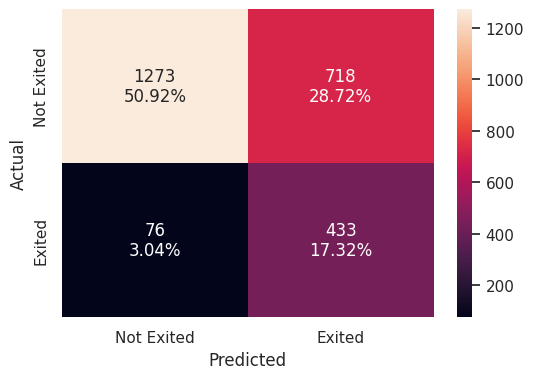

In [151]:
# Calculating the confusion matrix for the Validation data
make_confusion_matrix(y_val,y_val_pred)

**Observations:**

With the SDG Optimizer and SMOTE, I was able to get the traning data to 90 percent and the validation data to 85 percent for the 1s recall values.  The Recall curve for both the training data and validation data has more distance in it and the validataion data crosses over and expands away from the training data.  I'd rather see the 2 curve follow together but this model has the best results for the 1s recall validation data.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [152]:
# Clearing the backend and setting the random variable

set_clear_random()

In [153]:
# Initializing the model
model_4 = Sequential()
# Adding the input layer with 8 neurons and tanh as activation function
model_4.add(Dense(16,activation='tanh',input_dim = X_train_smote.shape[1]))
# Adding the input layer with 8 neurons and tanh as activation function
model_4.add(Dense(8,activation='tanh'))
# Adding the input layer with 8 neurons and tanh as activation function
model_4.add(Dense(8,activation='tanh'))
# Adding an output layer with 1 neuron and sigmoid as activation function
model_4.add(Dense(1, activation = 'sigmoid'))

In [154]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.0005)

# Using the Recall metric
metric = keras.metrics.Recall()

In [155]:
# Using the binary_crossentropy loss function with the optimizer and metric listed above
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [156]:
# Showing the Output Shape and Paramerter #s of the model
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409 (1.60 KB)

 Trainable params: 409 (1.60 KB)

 Non-trainable params: 0 (0.00 B)

In [157]:
# Setting the number of epochs and batch_size

epochs = 70
batch_size = 128

In [158]:
# Running the epochs with parameters from above, while collecting the start and end times

start = time.time()
history_4 = model_4.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, verbose=1)
end=time.time()

Epoch 1/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6845 - recall: 0.2856 - val_loss: 0.6192 - val_recall: 0.5540
Epoch 2/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6219 - recall: 0.6275 - val_loss: 0.5966 - val_recall: 0.6444
Epoch 3/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5854 - recall: 0.6876 - val_loss: 0.5833 - val_recall: 0.6542
Epoch 4/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5660 - recall: 0.7025 - val_loss: 0.5769 - val_recall: 0.6680
Epoch 5/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5548 - recall: 0.7098 - val_loss: 0.5728 - val_recall: 0.6582
Epoch 6/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5470 - recall: 0.7211 - val_loss: 0.5699 - val_recall: 0.6523
Epoch 7/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5411 - recall: 0.7236 - val_loss: 0.5679 - val_recall: 0.6582
Epoch 8/70
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5367 - recall: 0.7308 - val_loss: 0.5664 - val_recall: 0.6640
Epoch 9/70
63/63 ━━━━━━

In [159]:
# Printing the time taken to run the model

print("Time taken in seconds ",end-start)

Time taken in seconds  28.403162240982056


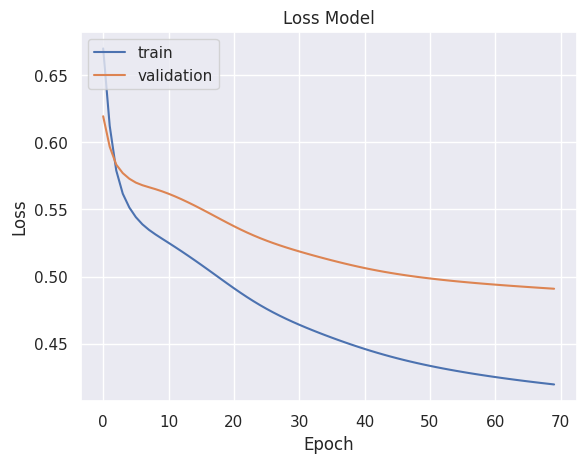

In [160]:
# Showing the Loss Model
make_loss_model(history_4)

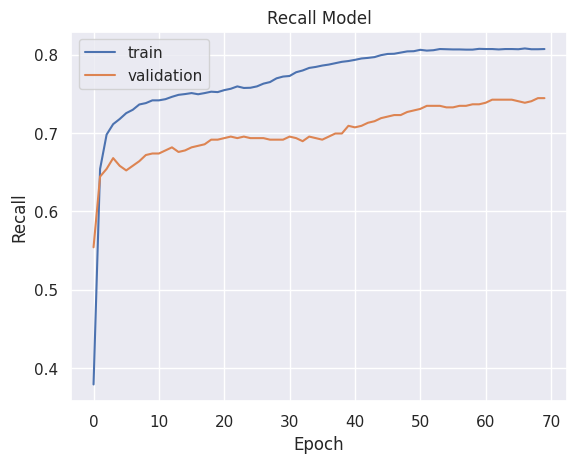

In [161]:
# Showing the Recall Model
make_recall_model(history_4)

In [162]:
# Collecting the training recall data for this model
y_train_pred = train_pred(model_4, X_train_smote)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [163]:
# Collecting the validation recall data for this model
y_val_pred = val_pred(model_4, X_val)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [164]:
# Collecting the model_name and calculating the time taken to run the model
model_name = "NN with SMOTE & Adam"
time_taken = end-start

In [165]:
# Adding to the function to show the collected training recall data
train_metric(model_name, y_train_smote, y_train_pred)

In [166]:
# Adding to the function to show the collected validation recall data
valid_metric(model_name, y_val, y_val_pred)

In [167]:
# Adding to the function to show the collected history time data
history_time(model_name, time_taken)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3981
           1       0.80      0.81      0.81      3981

    accuracy                           0.80      7962
   macro avg       0.80      0.80      0.80      7962
weighted avg       0.80      0.80      0.80      7962



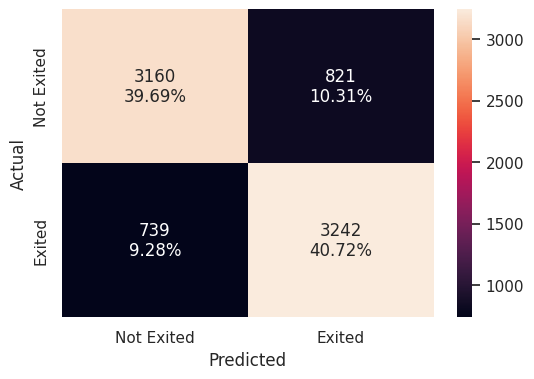

In [168]:
# Calculating the confusion matrix for the Training data
make_confusion_matrix(y_train_smote, y_train_pred)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1991
           1       0.47      0.74      0.58       509

    accuracy                           0.78      2500
   macro avg       0.70      0.77      0.71      2500
weighted avg       0.83      0.78      0.79      2500



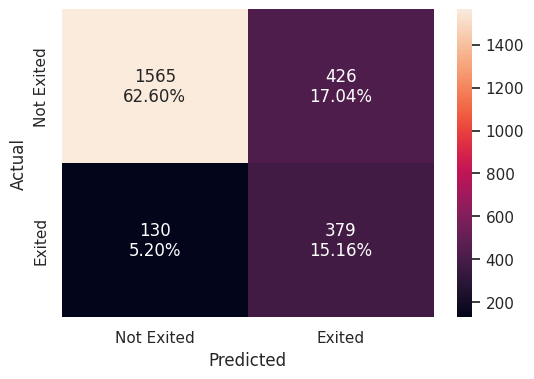

In [169]:
# Calculating the confusion matrix for the Validation data
make_confusion_matrix(y_val,y_val_pred)

**Observations:**

With the Adam Optimizer and SMOTE, I was able to get the traning data to 81 percent and the validation data to 5744 percent for the 1s recall values.  The Recall curve for both the training data and validation data maintain a gap.  This may be due to the fact that the training data has been balanced and the validation data is still imbalanced.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [170]:
# Clearing the backend and setting the random variable

set_clear_random()

In [171]:
# Initializing the model
model_5 = Sequential()
# Adding the input layer with 16 neurons and tanh as activation function
model_5.add(Dense(16,activation='tanh' ,input_dim = X_train_smote.shape[1]))
# Adding a dropout with ratio of 0.1
model_5.add(Dropout(0.05))
# Adding the input layer with 16 neurons and tanh as activation function
model_5.add(Dense(16,activation='tanh'))
# Adding a dropout with ratio of 0.05
model_5.add(Dropout(0.1))
# Adding the input layer with 16 neurons and tanh as activation function
model_5.add(Dense(16,activation='tanh'))
# Adding an output layer with 1 neuron and sigmoid as activation function
model_5.add(Dense(1, activation = 'sigmoid'))

In [172]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam(0.0003)

# Using the Recall metric
metric = keras.metrics.Recall()

In [173]:
# Using the binary_crossentropy loss function with the optimizer and metric listed above
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [174]:
# Showing the Output Shape and Paramerter #s of the model
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 753 (2.94 KB)

 Trainable params: 753 (2.94 KB)

 Non-trainable params: 0 (0.00 B)

In [175]:
# Setting the number of epochs and batch_size

epochs = 100
batch_size = 128

In [176]:
# Running the epochs with parameters from above, while collecting the start and end times

start = time.time()
history_5 = model_5.fit(X_train_smote, y_train_smote, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, verbose=1)
end=time.time()

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6776 - recall: 0.7844 - val_loss: 0.6381 - val_recall: 0.6562
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6341 - recall: 0.6261 - val_loss: 0.6076 - val_recall: 0.6306
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6105 - recall: 0.6471 - val_loss: 0.5949 - val_recall: 0.6424
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5993 - recall: 0.6493 - val_loss: 0.5887 - val_recall: 0.6542
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5883 - recall: 0.6670 - val_loss: 0.5842 - val_recall: 0.6542
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5791 - recall: 0.6803 - val_loss: 0.5778 - val_recall: 0.6542
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5744 - recall: 0.6864 - val_loss: 0.5747 - val_recall: 0.6660
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5643 - recall: 0.6996 - val_loss: 0.5728 - val_recall: 0.6562
Epoch 9/100
63/

In [177]:
# Printing the time taken to run the model

print("Time taken in seconds ",end-start)

Time taken in seconds  35.64691877365112


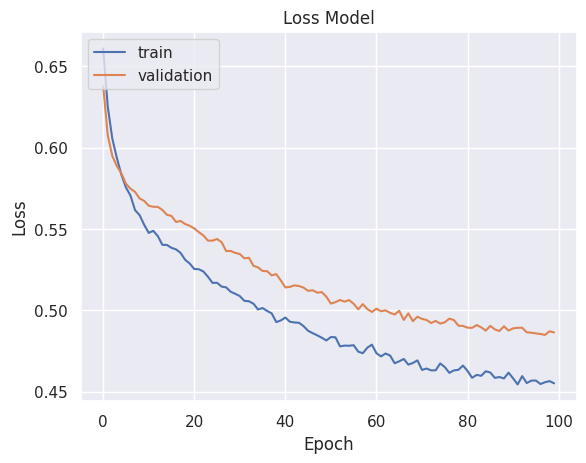

In [178]:
# Showing the Loss Model
make_loss_model(history_5)

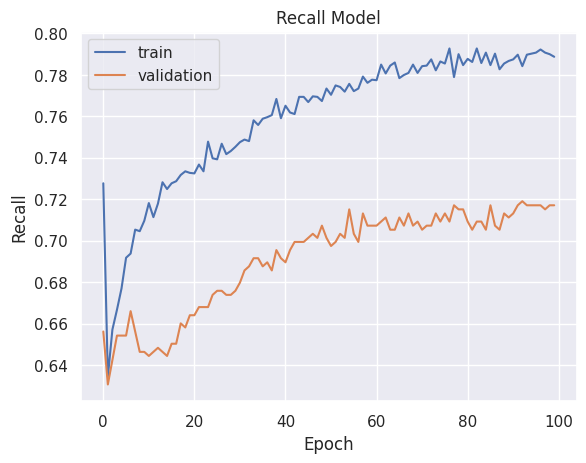

In [179]:
# Showing the Recall Model
make_recall_model(history_5)

In [180]:
# Collecting the training recall data for this model
y_train_pred = train_pred(model_5, X_train_smote)

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [181]:
# Collecting the validation recall data for this model
y_val_pred = val_pred(model_5, X_val)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [182]:
# Collecting the model_name and calculating the time taken to run the model
model_name = "NN with SMOTE,Adam & Dropout"
time_taken = end-start

In [183]:
# Adding to the function to show the collected training recall data
train_metric(model_name, y_train_smote, y_train_pred)

In [184]:
# Adding to the function to show the collected validation recall data
valid_metric(model_name, y_val, y_val_pred)

In [185]:
# Adding to the function to show the collected history time data
history_time(model_name, time_taken)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3981
           1       0.79      0.80      0.80      3981

    accuracy                           0.80      7962
   macro avg       0.80      0.80      0.80      7962
weighted avg       0.80      0.80      0.80      7962



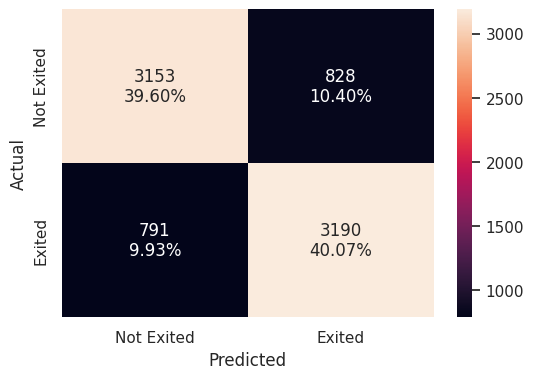

In [186]:
# Calculating the confusion matrix for the Training data
make_confusion_matrix(y_train_smote, y_train_pred)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1991
           1       0.46      0.72      0.56       509

    accuracy                           0.77      2500
   macro avg       0.69      0.75      0.70      2500
weighted avg       0.82      0.77      0.79      2500



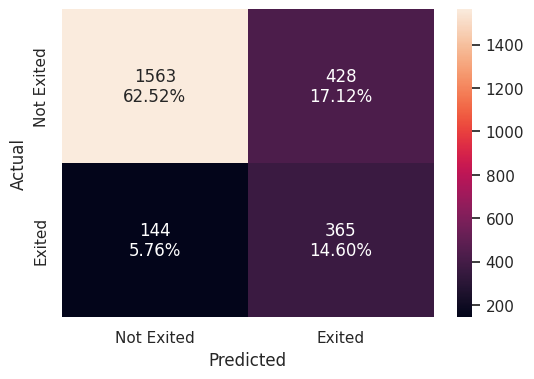

In [187]:
# Calculating the confusion matrix for the Validation data
make_confusion_matrix(y_val,y_val_pred)

**Observations:**

With the Adam Optimizer and SMOTE with Dropout, I was able to get the traning data to 80 percent and the validation data to 72 percent for the 1s recall values, which are lower values than the last 2 models.  The Recall curve for both the training data and validation data maintain a gap.  This may be due to the fact that the training data is balanced and the validation data is still imbalanced.  When you look at the curve data there is more noise/oscillation of the data.

## Model Performance Comparison and Final Model Selection

In [188]:
# Printing the comparison of the Training performance for the recall variable

print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.590775
NN with Adam,0.590775
NN with Adam & Dropout,0.569185
NN with SMOTE & SGD,0.902286
NN with SMOTE & Adam,0.814368
"NN with SMOTE,Adam & Dropout",0.801306


In [189]:
# Printing the comparison of the Validation performance for the recall variable

print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.540275
NN with Adam,0.546169
NN with Adam & Dropout,0.526523
NN with SMOTE & SGD,0.850688
NN with SMOTE & Adam,0.744597
"NN with SMOTE,Adam & Dropout",0.717092


In [190]:
# Printing the comparison of the Testing performance for the recall variable

print("Test vs. Validation set performance difference")
train_metric_df - valid_metric_df

Test vs. Validation set performance difference


,recall
NN with SGD,0.050500
NN with Adam,0.044606
NN with Adam & Dropout,0.042663
NN with SMOTE & SGD,0.051598
NN with SMOTE & Adam,0.069771
"NN with SMOTE,Adam & Dropout",0.084214


**Observations:**

NN with SMOTE & SGD has the lowest difference for the group that has the highest recall values.

In [191]:
# Printing the comparison of the History time in seconds performance for the recall variable

print("Time in seconds set performance comparison")
history_time__df

Time in seconds set performance comparison


,Time taken in seconds
NN with SGD,26.305156
NN with Adam,29.177991
NN with Adam & Dropout,102.012142
NN with SMOTE & SGD,14.372216
NN with SMOTE & Adam,28.403162
"NN with SMOTE,Adam & Dropout",35.646919


**Observations:**

NN with SMOTE & SGD has the shortest time in seconds of all the optimizers.

In [192]:
# Choosing the best model to check the Recall value of the Test data

y_test_pred = test_pred(model_3, X_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


              precision    recall  f1-score   support

           0       0.95      0.63      0.76      1991
           1       0.38      0.88      0.53       509

    accuracy                           0.68      2500
   macro avg       0.66      0.75      0.64      2500
weighted avg       0.83      0.68      0.71      2500



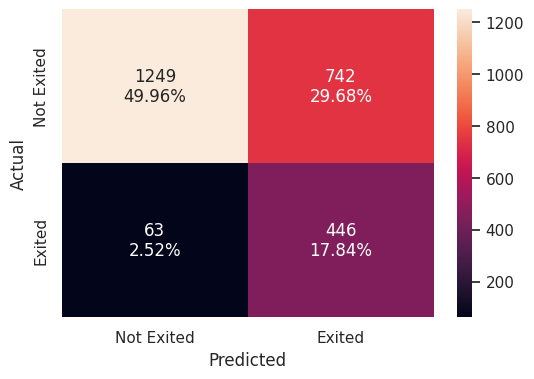

In [193]:
# Calculating the confusion matrix for the Test data
make_confusion_matrix(y_test,y_test_pred)

In [194]:
# Collecting the model_name and Recall metric
model_name2 = "Test Data Recall"

test_metric_df.loc[model_name2] = recall_score(y_test, y_test_pred)

In [195]:
# Adding to the function to show the collected training recall data
test_metric(model_name2, y_test, y_test_pred)

In [196]:
# Printing the comparison of the test performance for the recall variable

print("Validation set performance comparison")
test_metric_df

Validation set performance comparison


,recall
Test Data Recall,0.876228


**Observations:**

The test data for the NN with SMOTE & SGD optimizer has a recall of 87.6228 for the 1 variable.

## Actionable Insights and Business Recommendations

* The bank should be able to deploy the NN with SMOTE and SGD model and know that they should be able to know with a high degree of certainty that the model will know if a customer is going to exit the bank or not exit the bank.

* It might be a good idea to try and attract younger customers, since they tend to stay with the bank.

* It may also be good to research ways to keep older customers at the bank since they are more likely to leave and tend to have higher balances.

* It would be a good idea to research why there is a higher turnover rate in Germany and see if there is a way to address this difference.

* It would be a good idea to find out why more women than men seem to exit the bank and address these items too.

* SMOTE was able to balance the training data set and did help to bring up the recall values significantly.  I believe that class_weights would have too, but I still have a ticket open to get this working correctly in my workbooks.  It is a good idea to balance or improve the balance of data sets for classification problems.

* For this dataset dropout seemed to show more noise in the curve data.  I need to observe dropout, batch normalization, and kernel initializers on more types of datasets.

* Momentum for the first SGD set with the data imbalance seemed to help, while when I tried it on the SGD with SMOTE balanced data it did not seem to help in the same way.

* For this data, I was having better results with tanh activation than with relu activation in the hidden layers.




<font size=6 color='blue'>Power Ahead</font>
___